<a href="https://colab.research.google.com/github/nit-esh1418/pyhton_programs/blob/main/satellite_numerical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.interpolate import CubicSpline
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/satellite_data/jan_train.csv', index_col=0);
r1,c1 = df.shape
print('The dataset has {} rows and {} columns'.format(r1,c1))
df.head()

The dataset has 503227 rows and 14 columns


epoch  sat_id             x             y             z  \
id                                                                              
0   2014-01-01 00:00:00.000       0  -8855.823863  13117.780146 -20728.353233   
1   2014-01-01 00:46:43.000       0 -10567.672384   1619.746066 -24451.813271   
2   2014-01-01 01:33:26.001       0 -10578.684043 -10180.467460 -24238.280949   
3   2014-01-01 02:20:09.001       0  -9148.251857 -20651.437460 -20720.381279   
4   2014-01-01 03:06:52.002       0  -6719.092336 -28929.061629 -14938.907967   

          Vx        Vy        Vz         x_sim         y_sim         z_sim  \
id                                                                           
0  -0.908303 -3.808436 -2.022083  -8843.131454  13138.221690 -20741.615306   
1  -0.302590 -4.272617 -0.612796 -10555.500066   1649.289367 -24473.089556   
2   0.277435 -4.047522  0.723155 -10571.858472 -10145.939908 -24271.169776   
3   0.715600 -3.373762  1.722115  -9149.620794 -20618.200201 -20765.019094   
4   0.992507 -2.519732  2.344703  -6729.358857 -28902.271436 -14992.399986   

      Vx_sim    Vy_sim    Vz_sim  
id                                
0  -0.907527 -3.804930 -2.024133  
1  -0.303704 -4.269816 -0.616468  
2   0.274880 -4.046788  0.718768  
3   0.712437 -3.375202  1.718306  
4   0.989382 -2.522618  2.342237

In [ ]:
number_of_unique_sat_id_values = df['sat_id'].nunique()
print(number_of_unique_sat_id_values)

600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503227 entries, 0 to 1233688
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   epoch   503227 non-null  object 
 1   sat_id  503227 non-null  int64  
 2   x       503227 non-null  float64
 3   y       503227 non-null  float64
 4   z       503227 non-null  float64
 5   Vx      503227 non-null  float64
 6   Vy      503227 non-null  float64
 7   Vz      503227 non-null  float64
 8   x_sim   503227 non-null  float64
 9   y_sim   503227 non-null  float64
 10  z_sim   503227 non-null  float64
 11  Vx_sim  503227 non-null  float64
 12  Vy_sim  503227 non-null  float64
 13  Vz_sim  503227 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 57.6+ MB


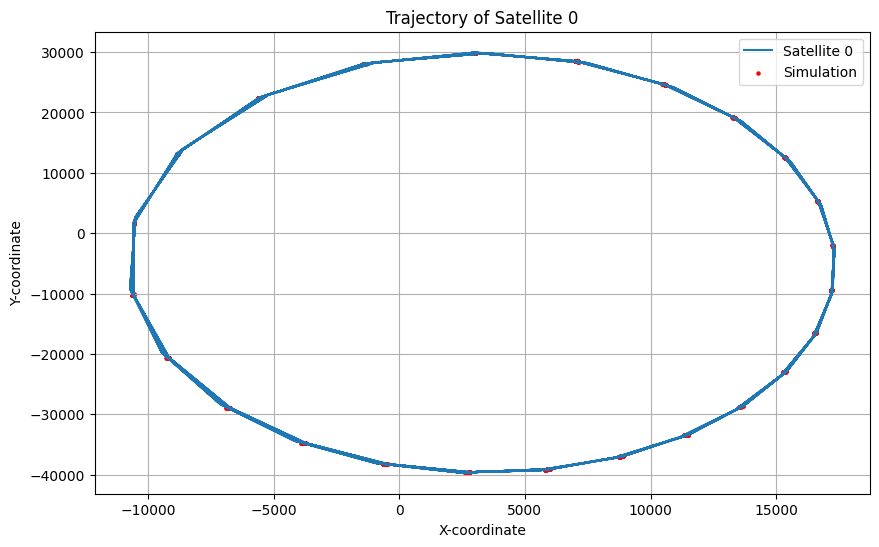

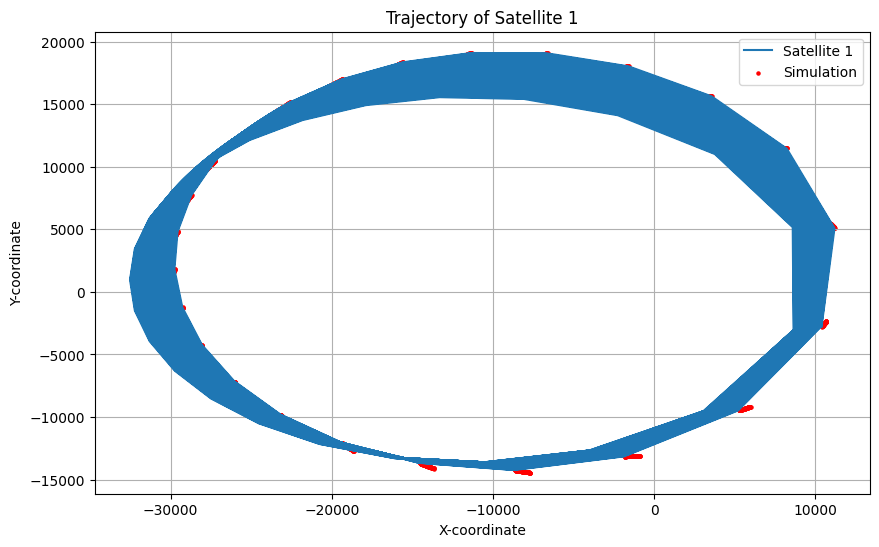

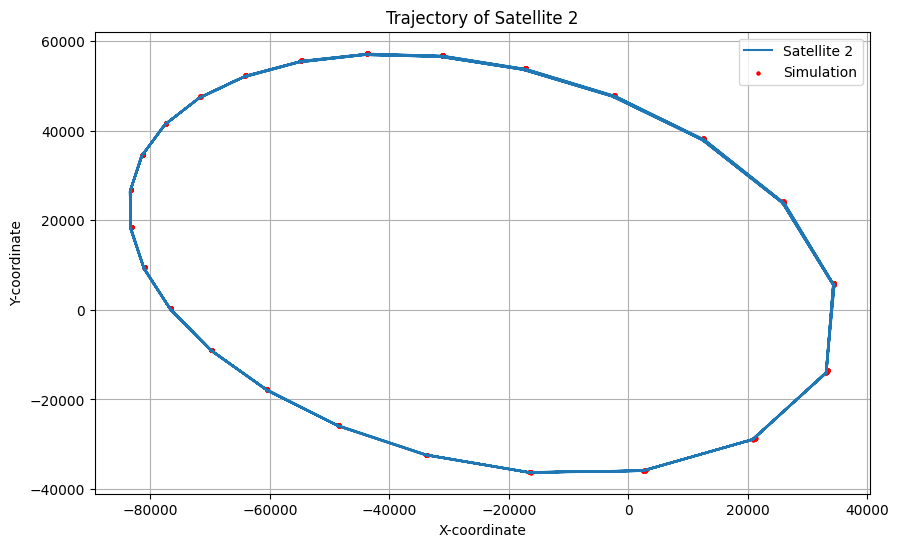

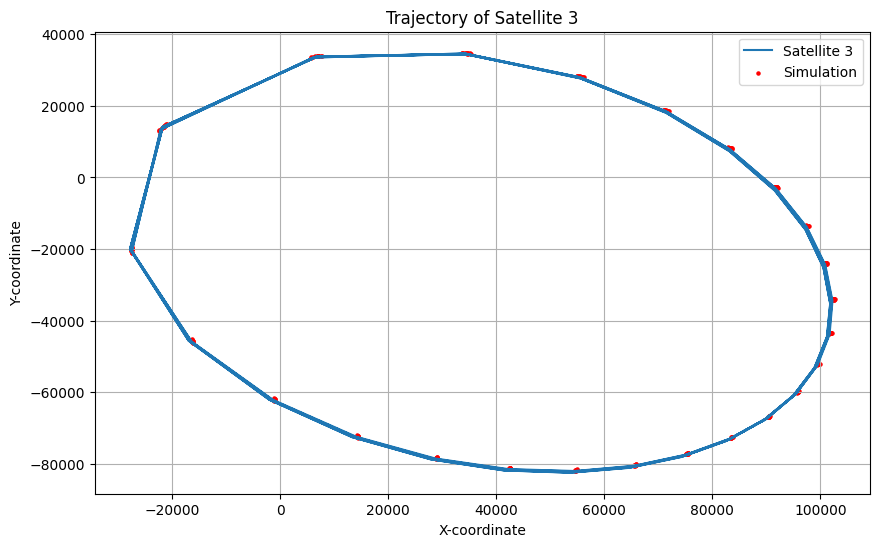

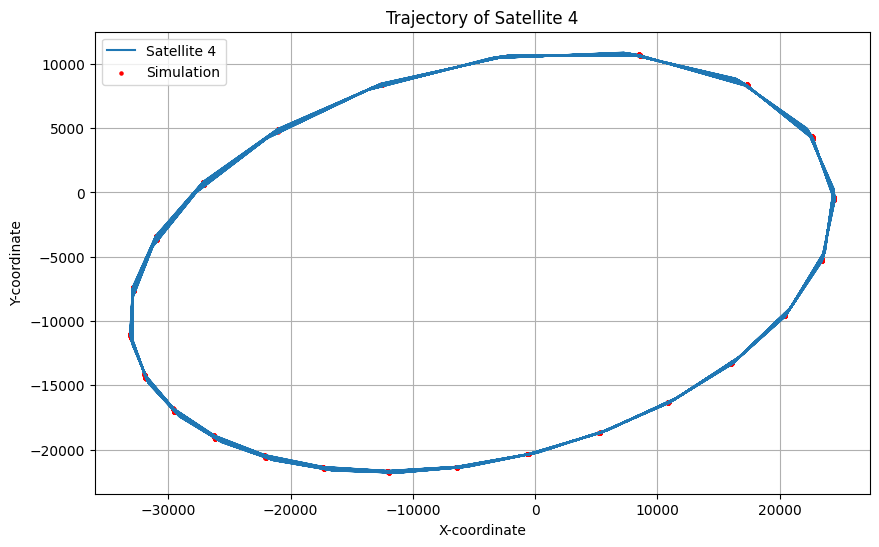

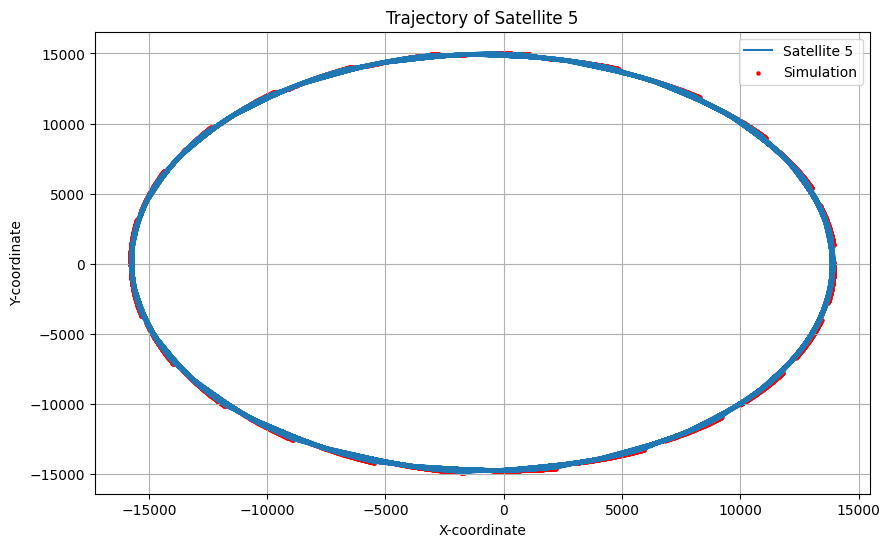

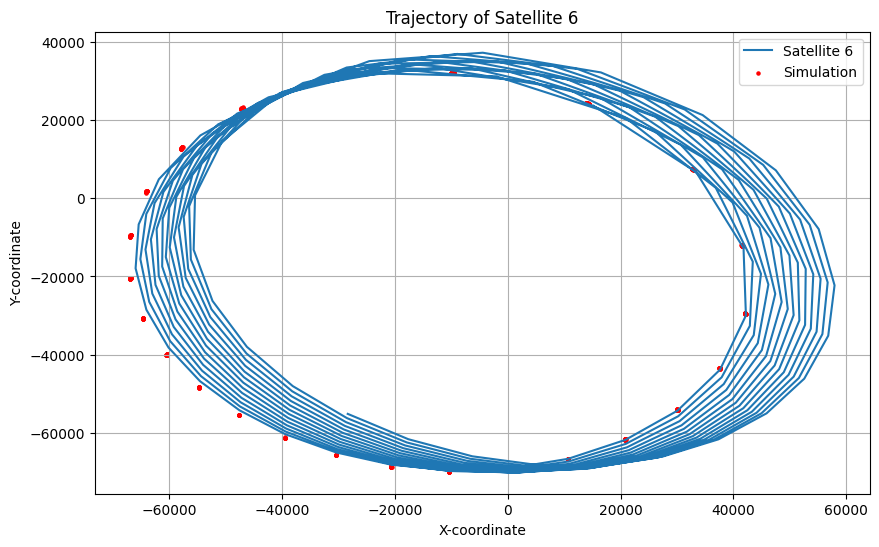

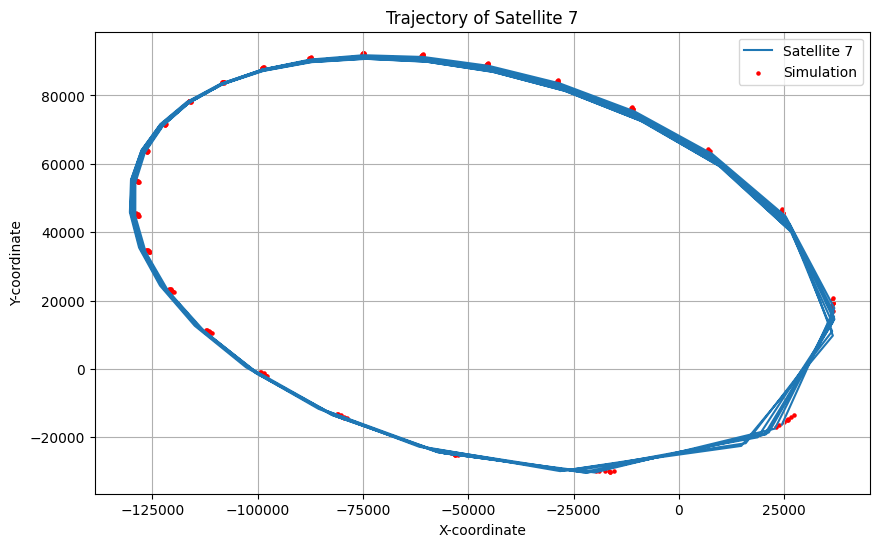

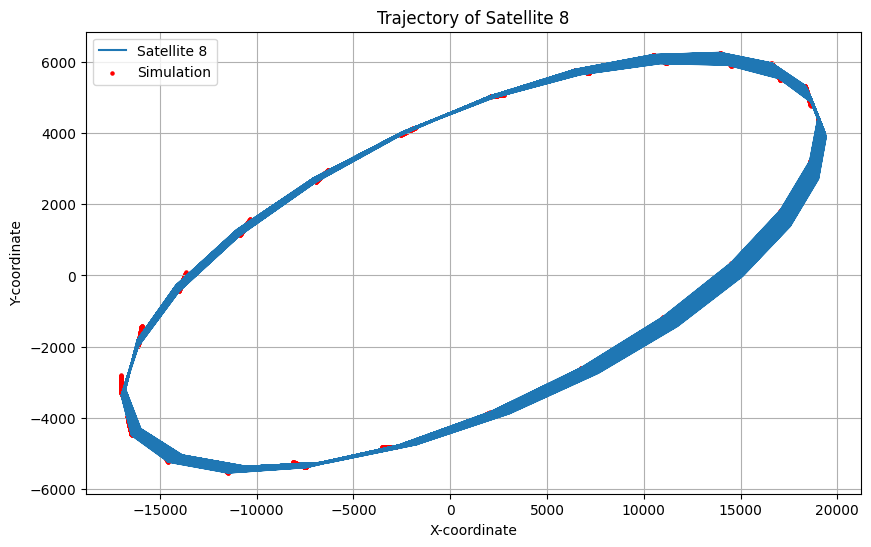

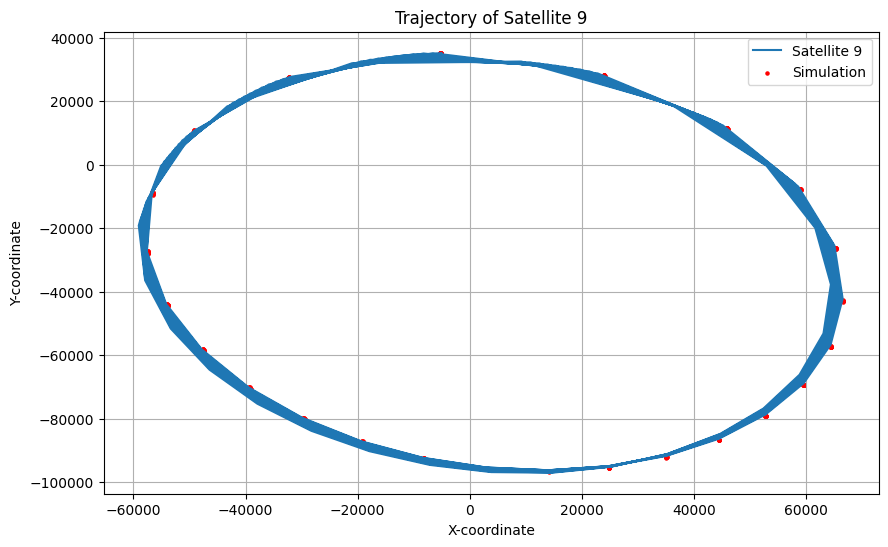

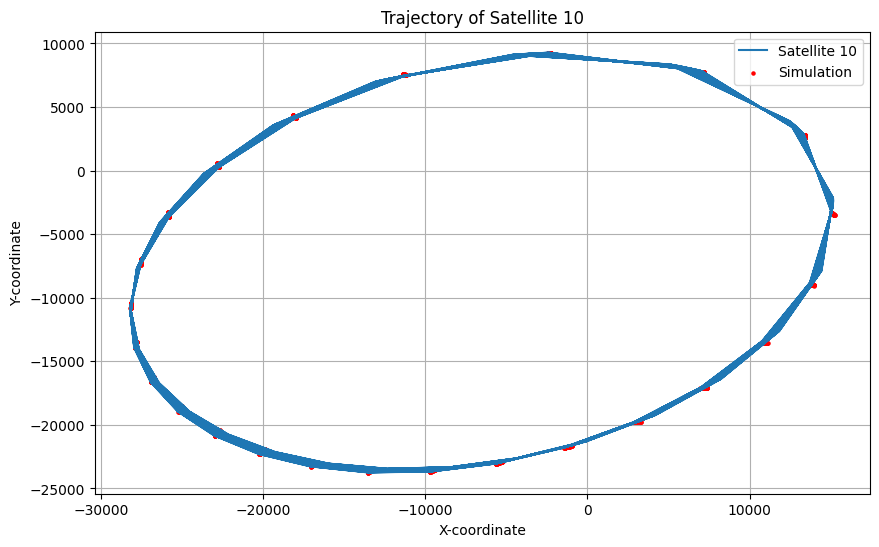

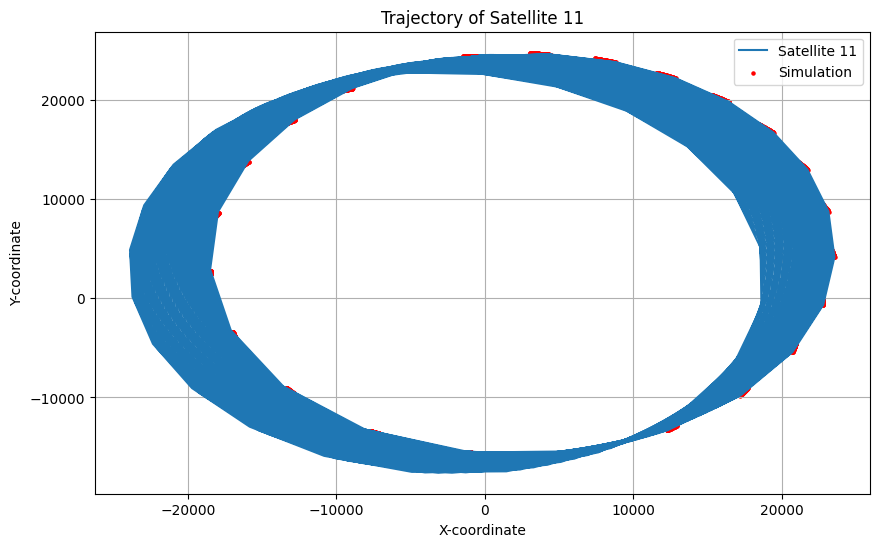

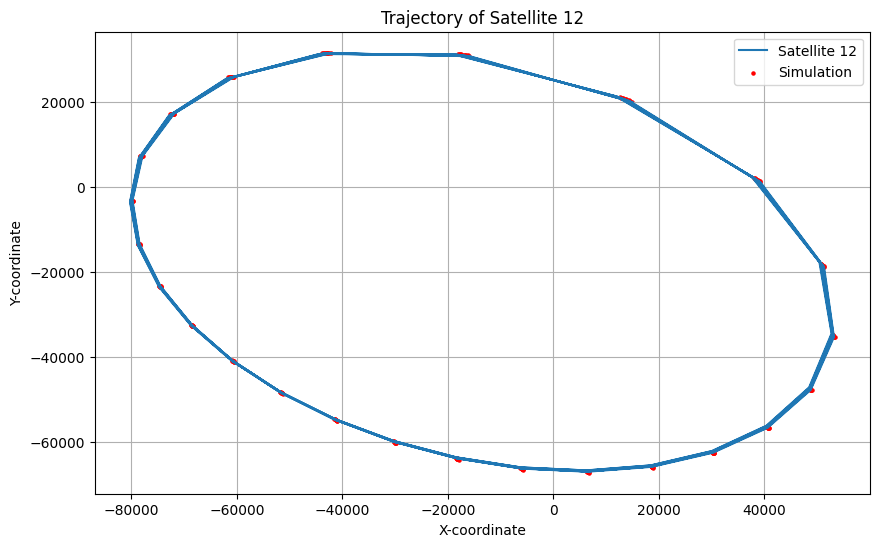

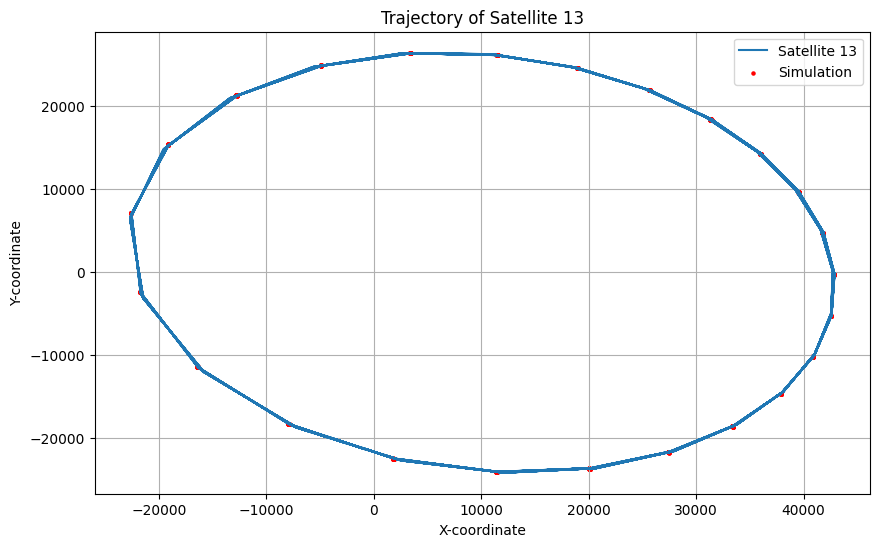

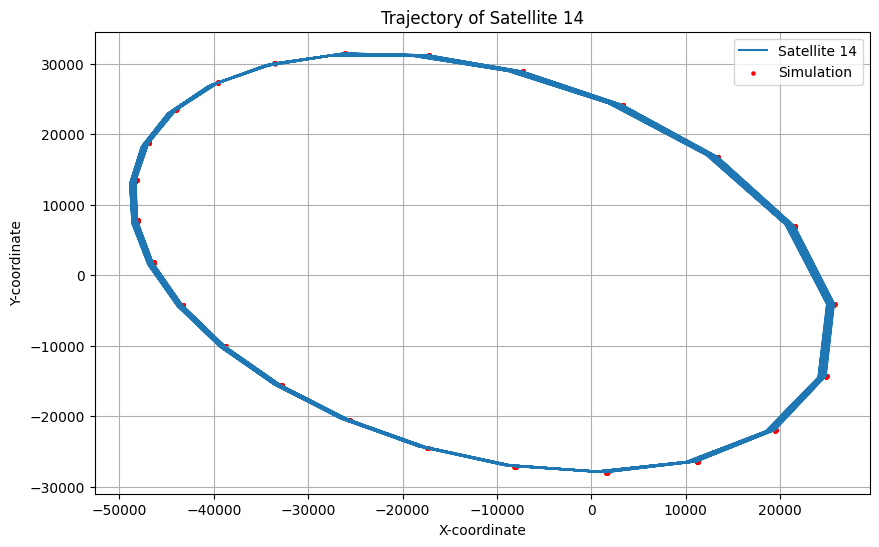

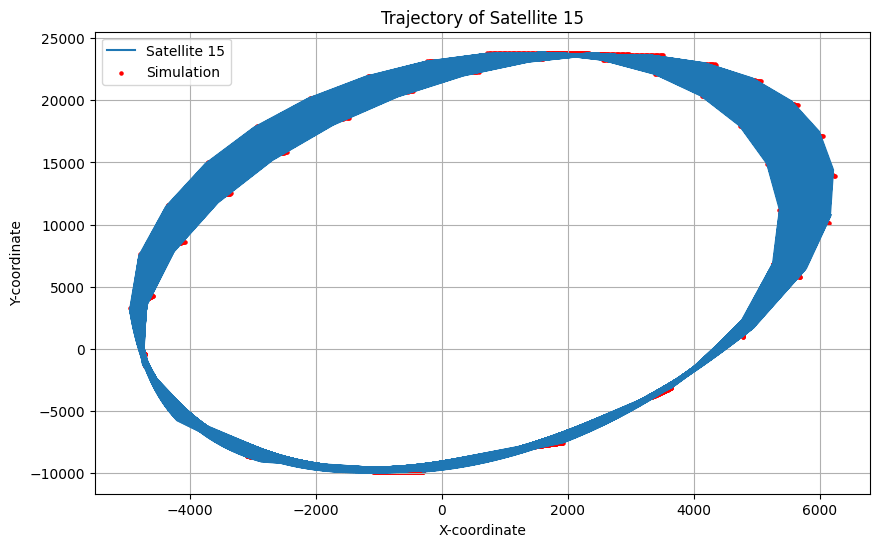

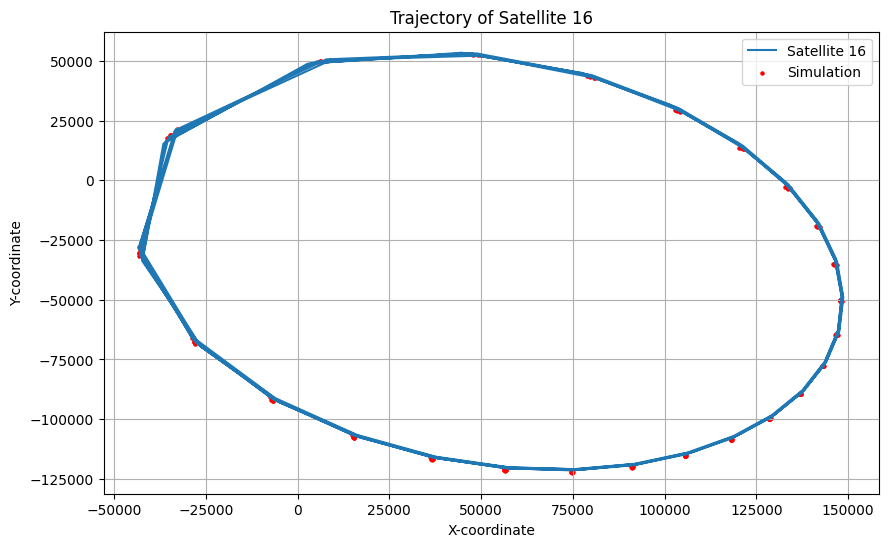

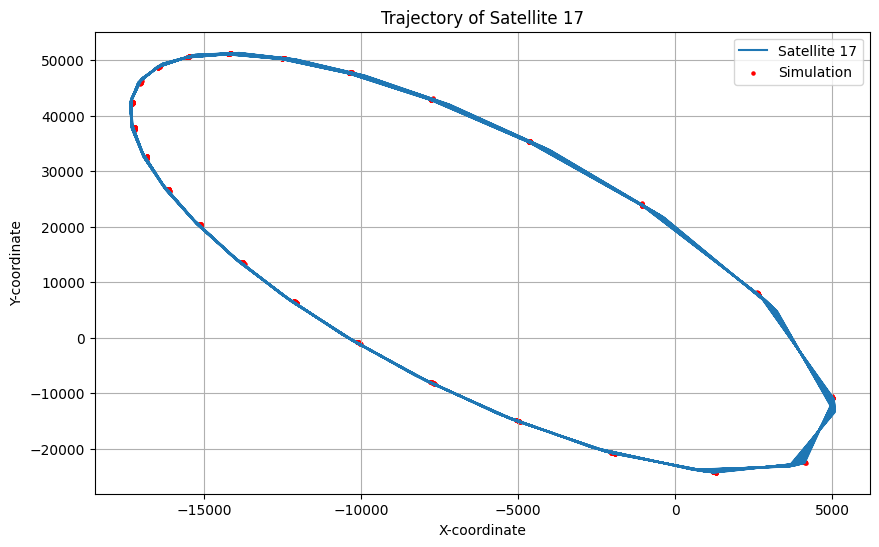

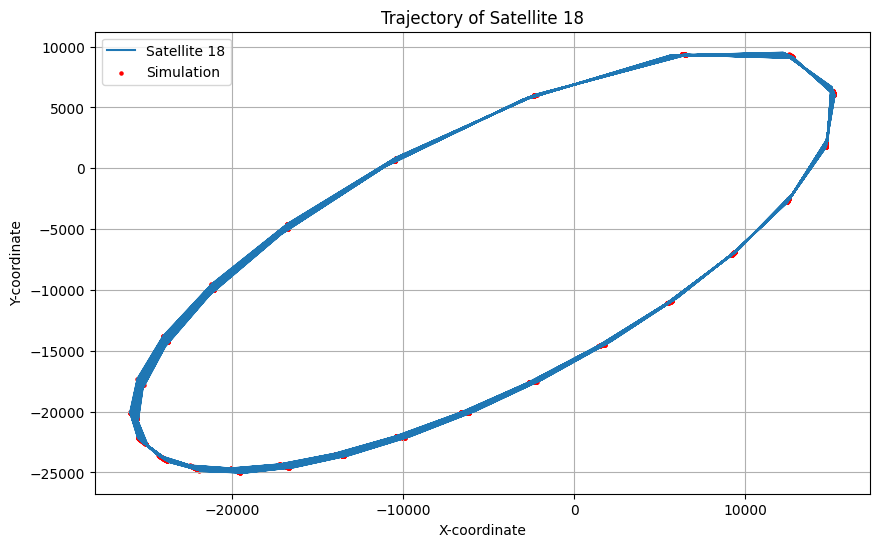

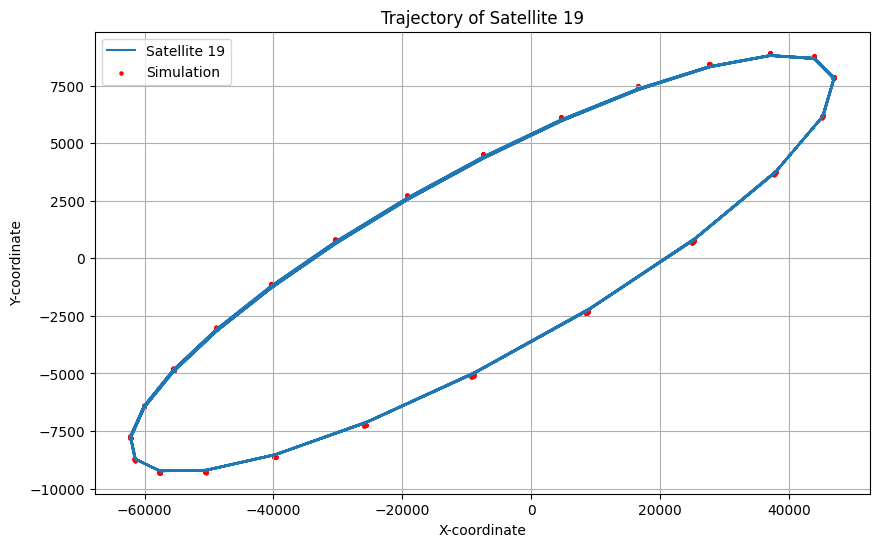

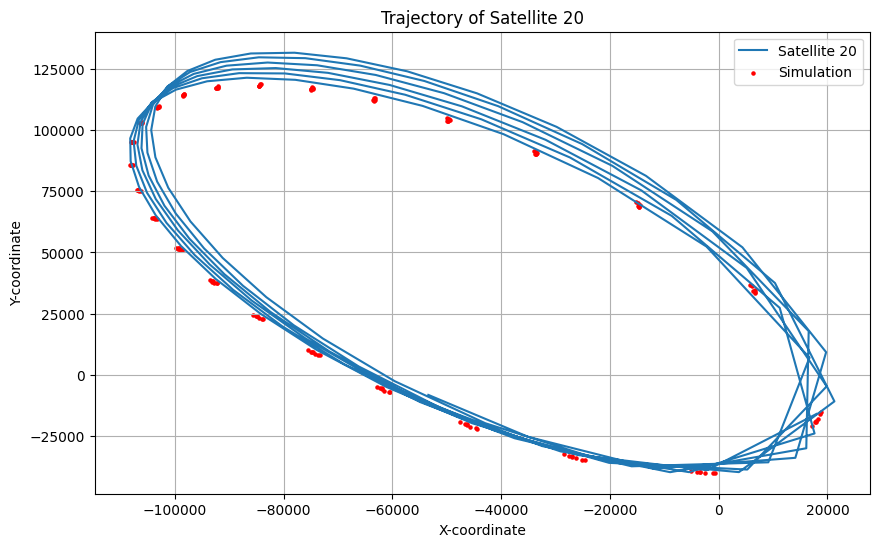

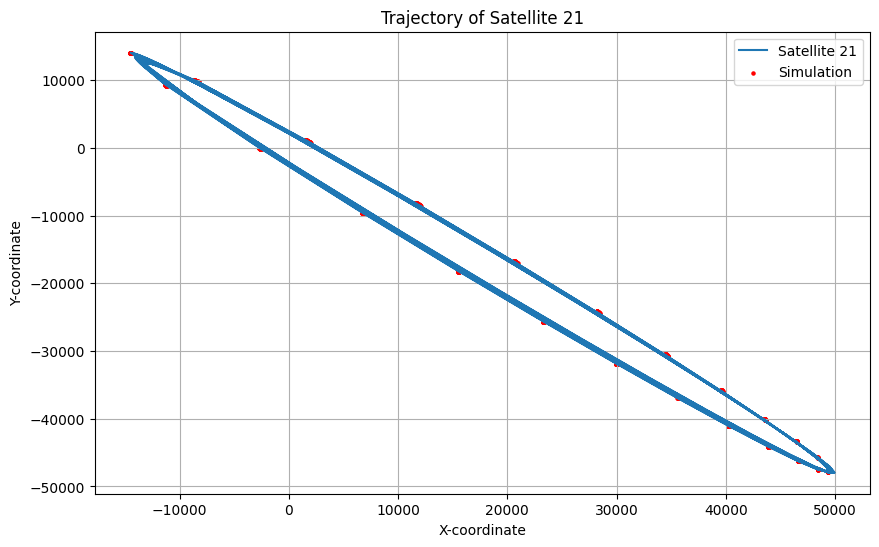

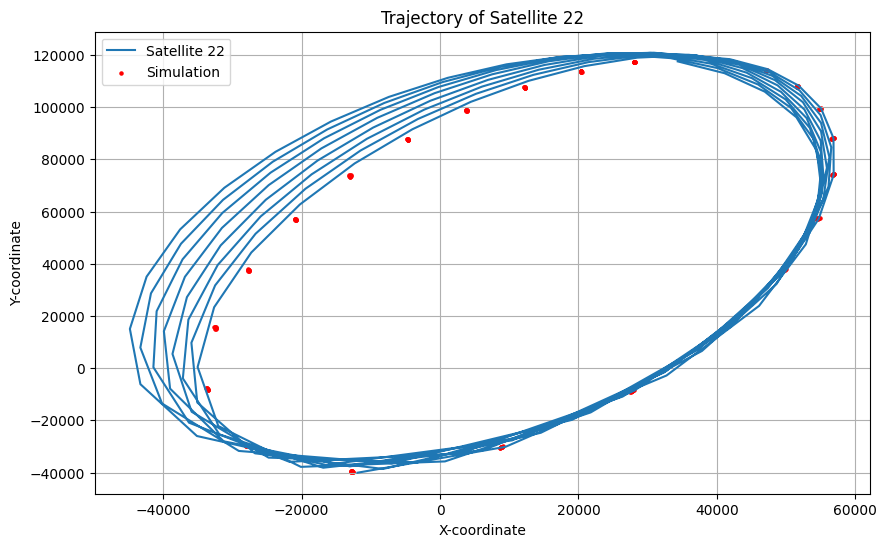

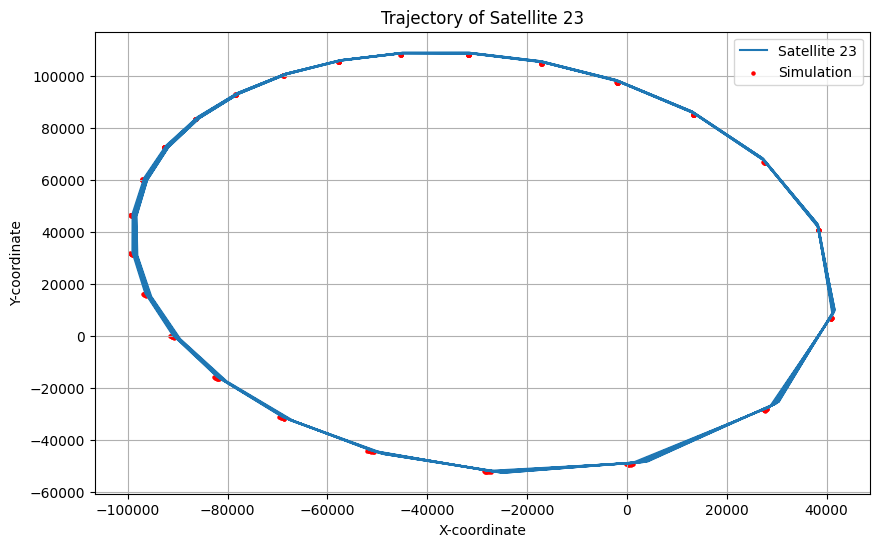

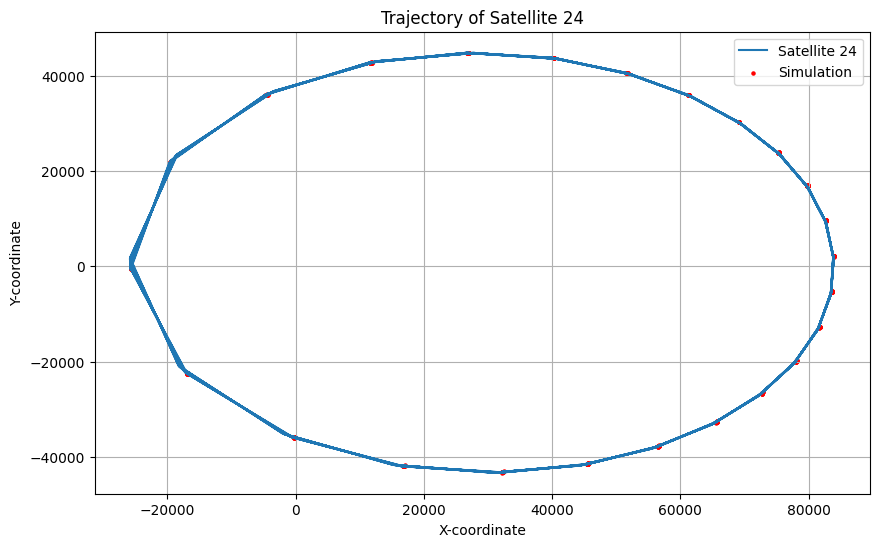

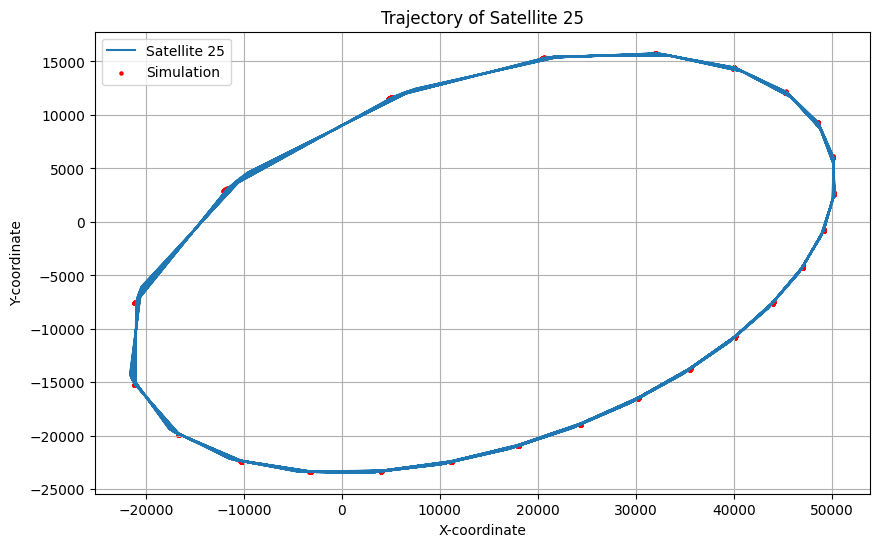

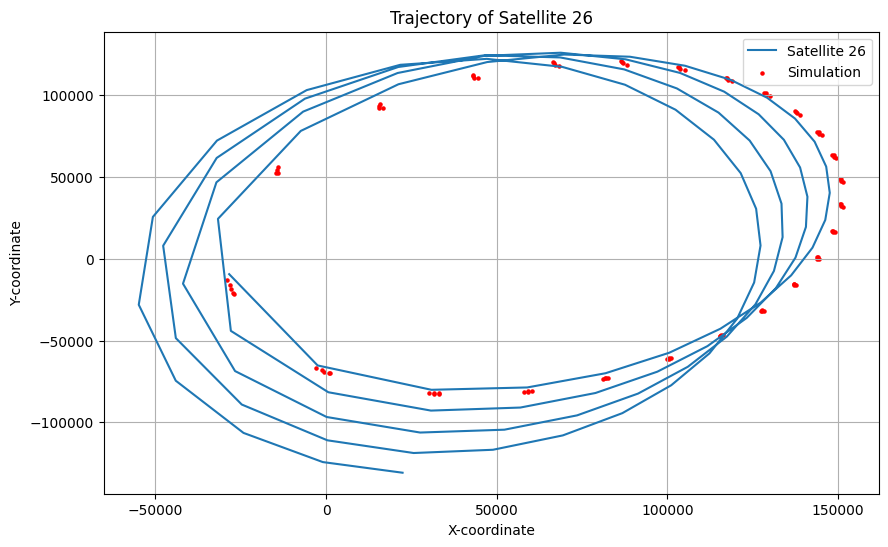

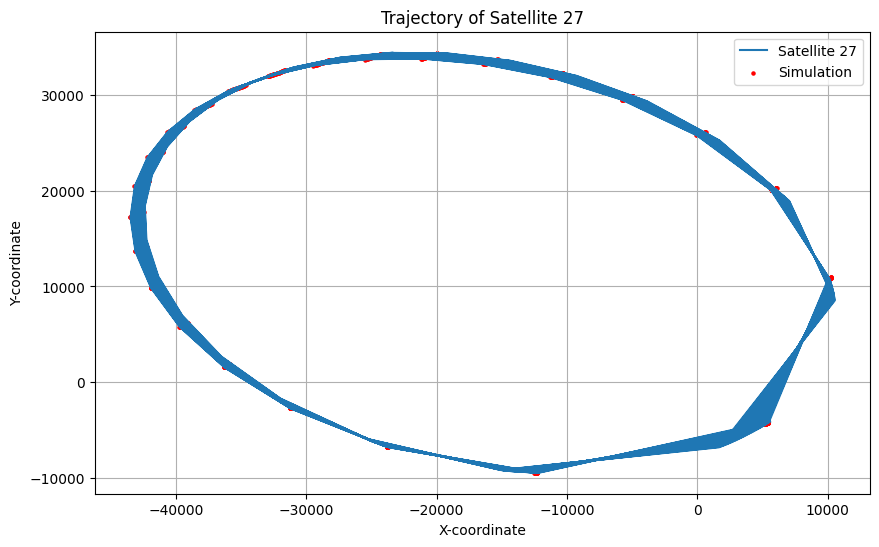

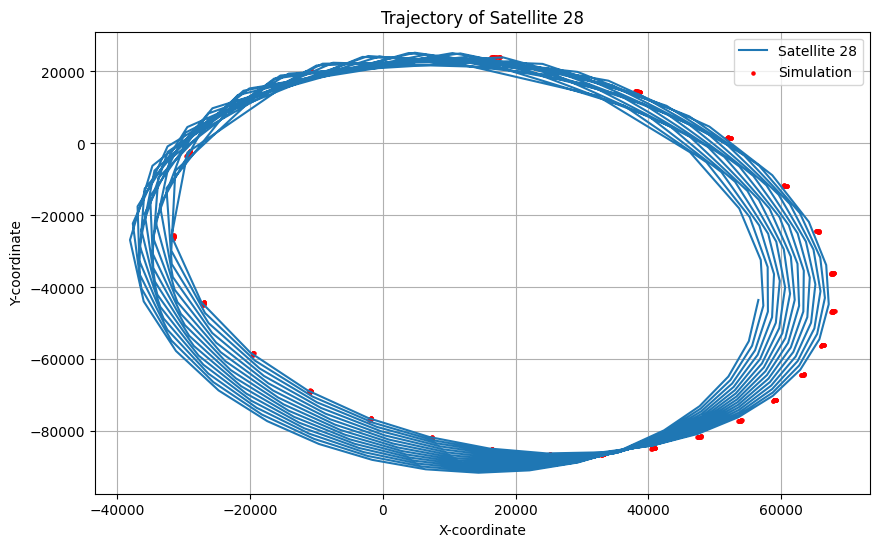

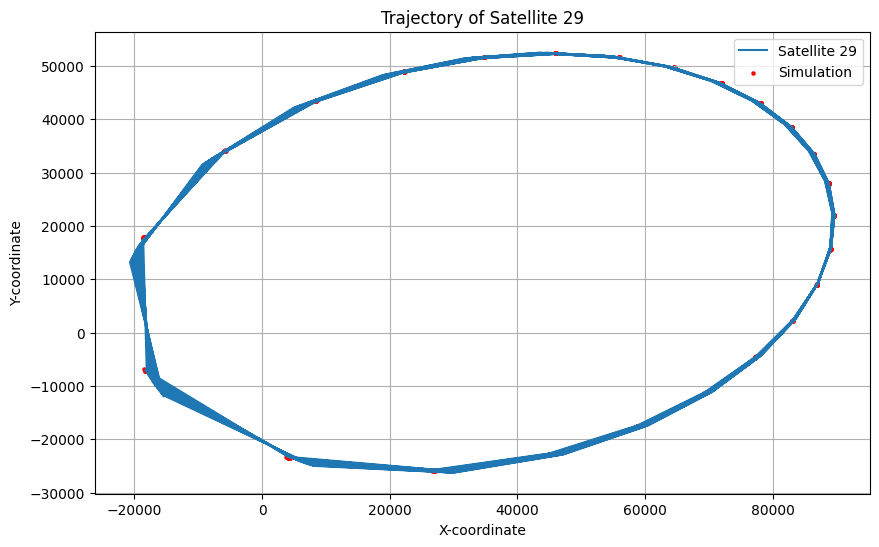

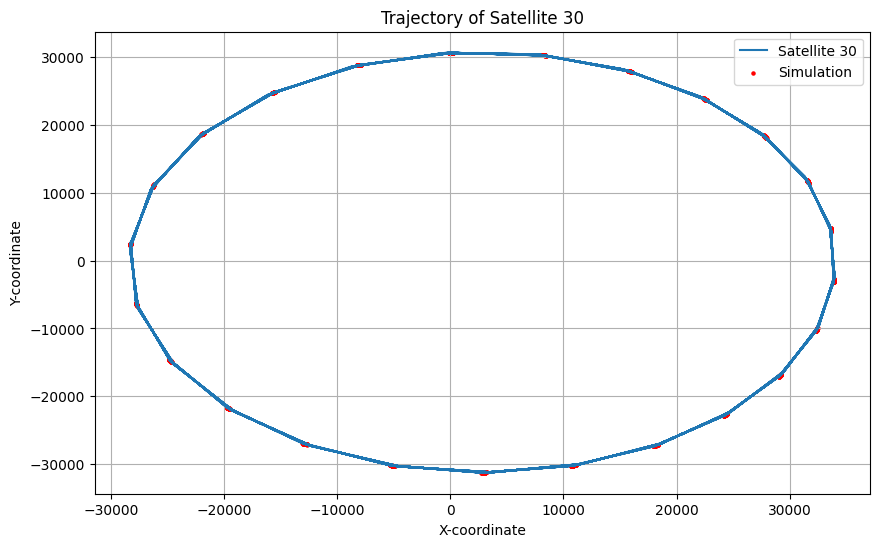

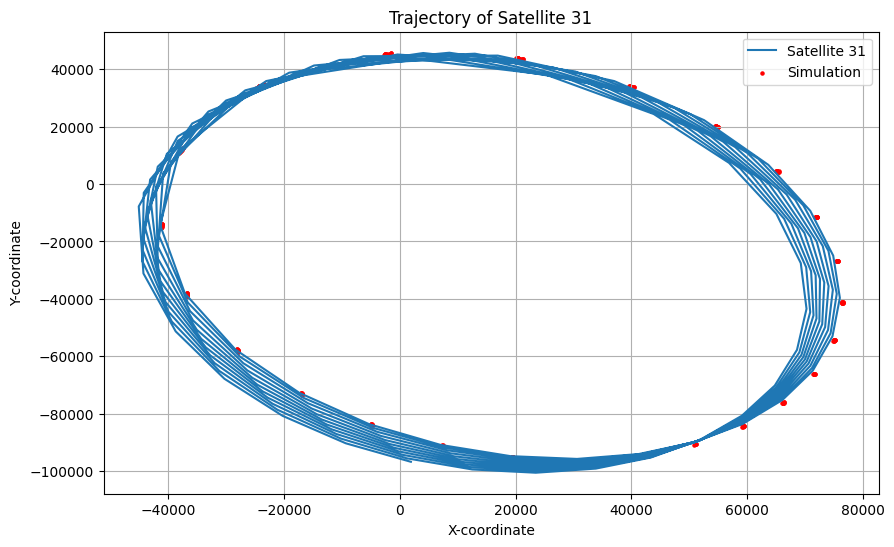

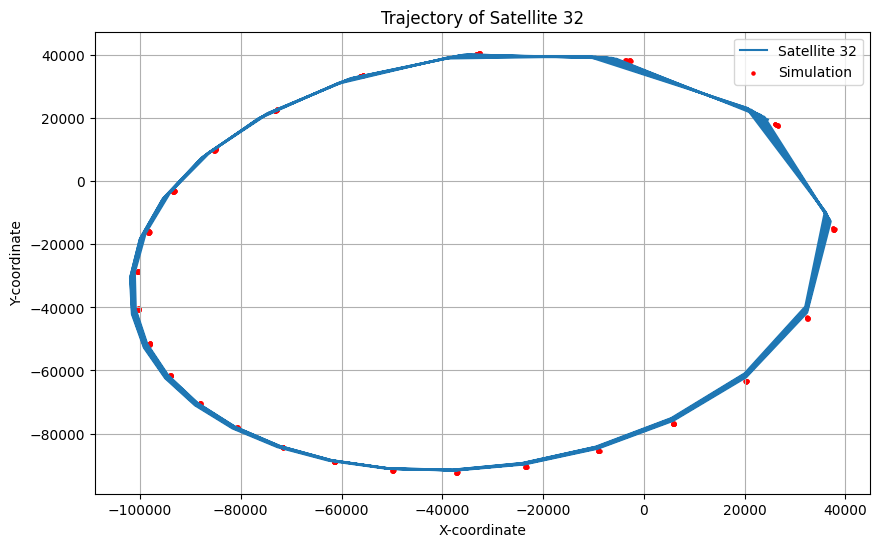

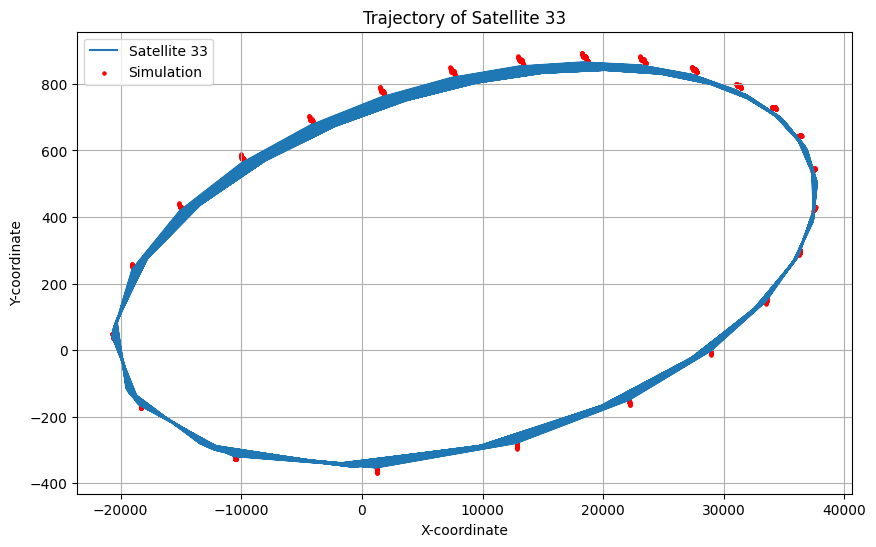

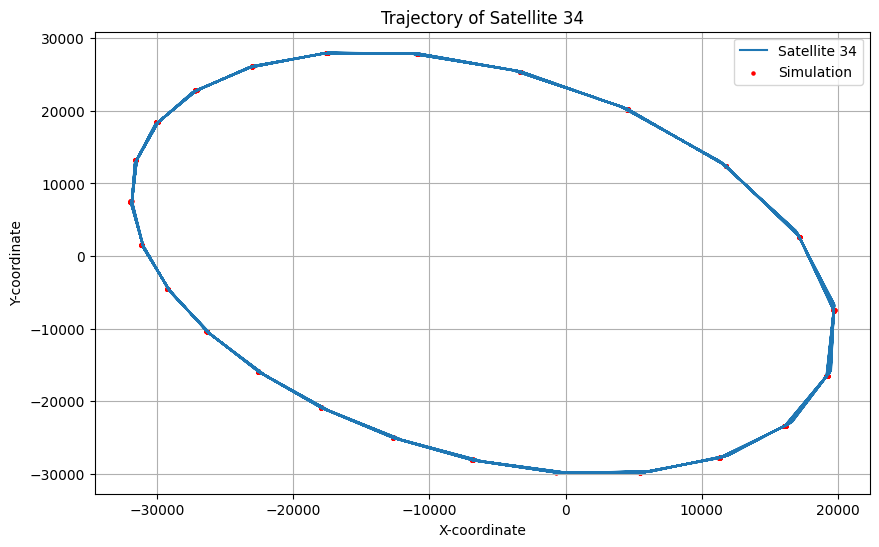

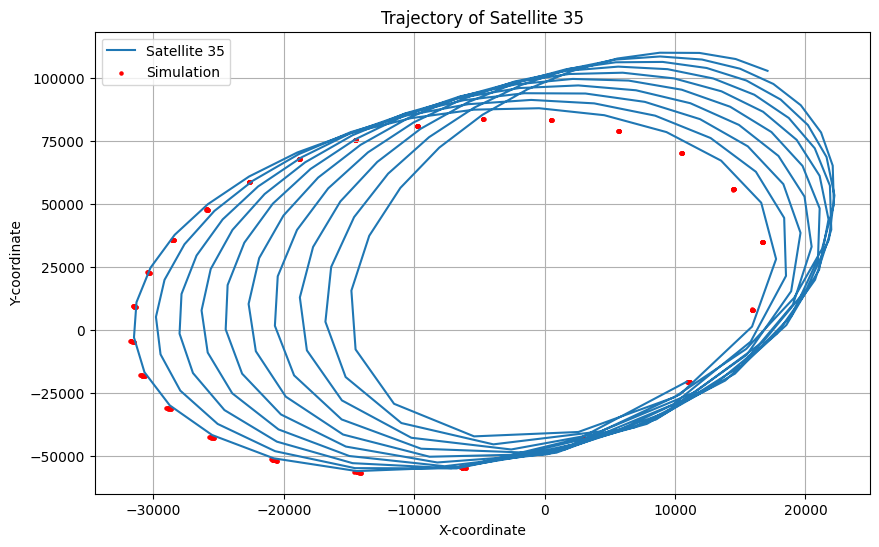

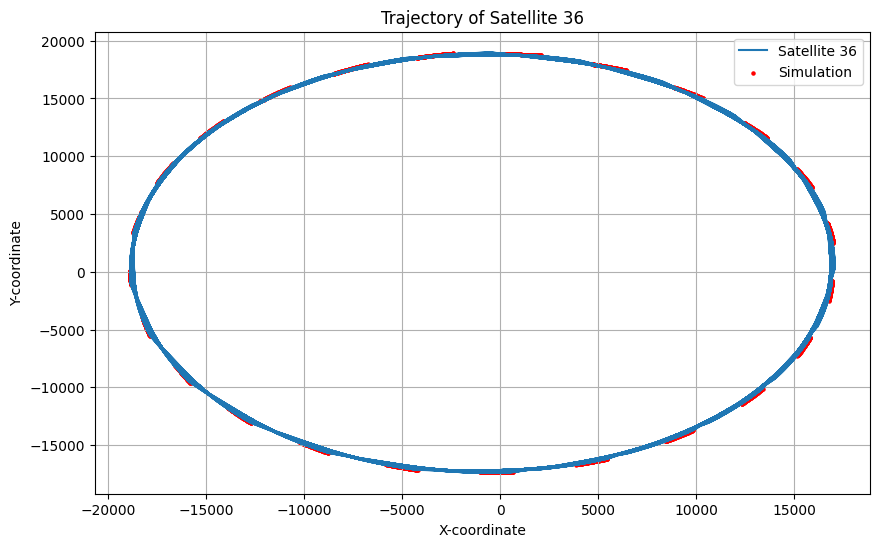

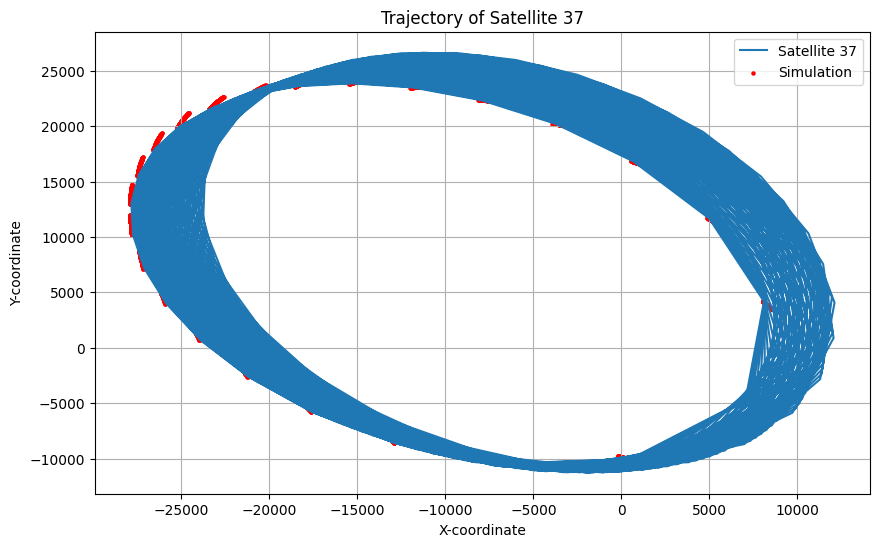

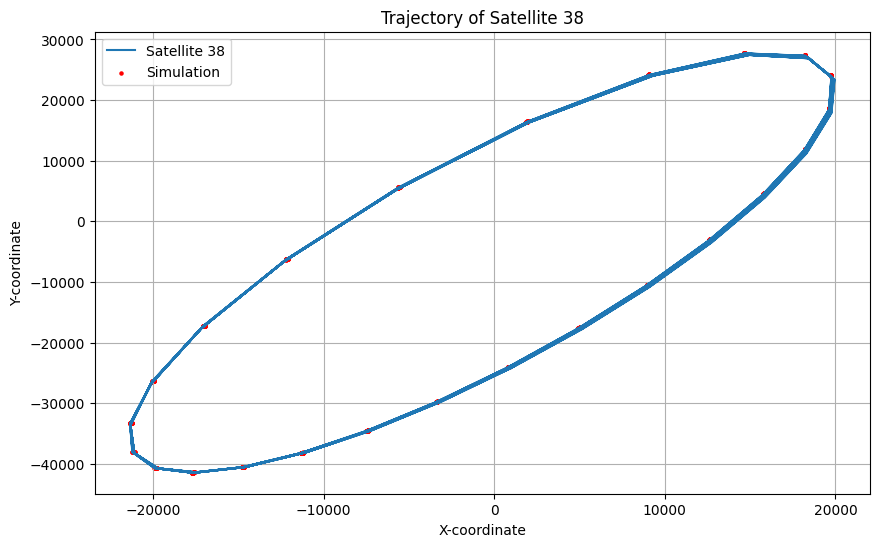

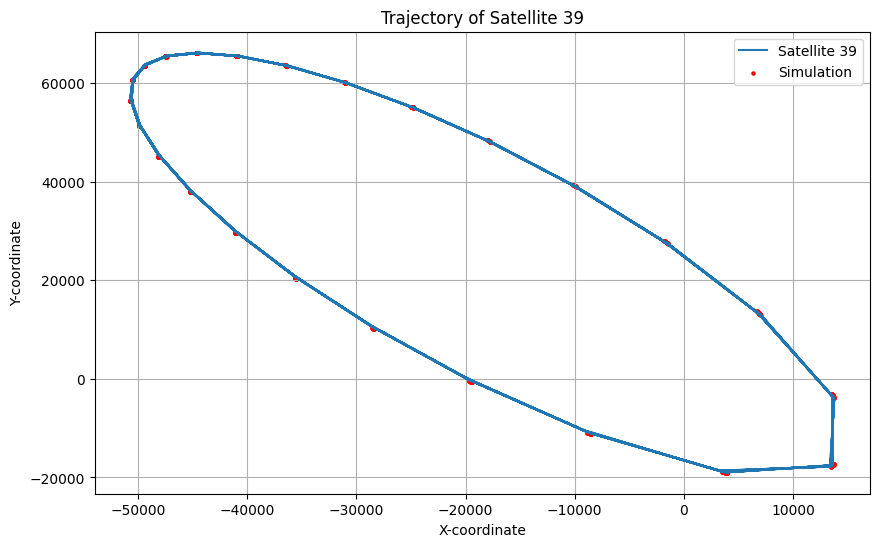

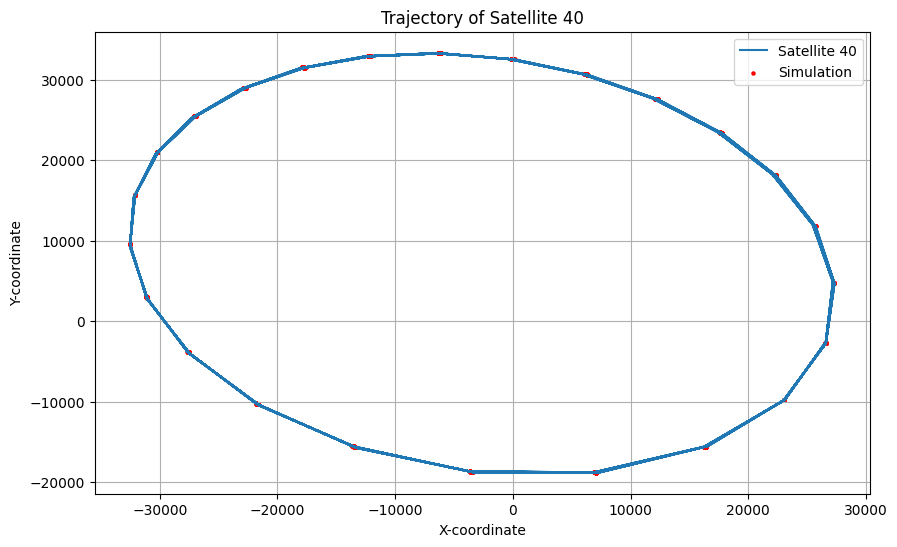

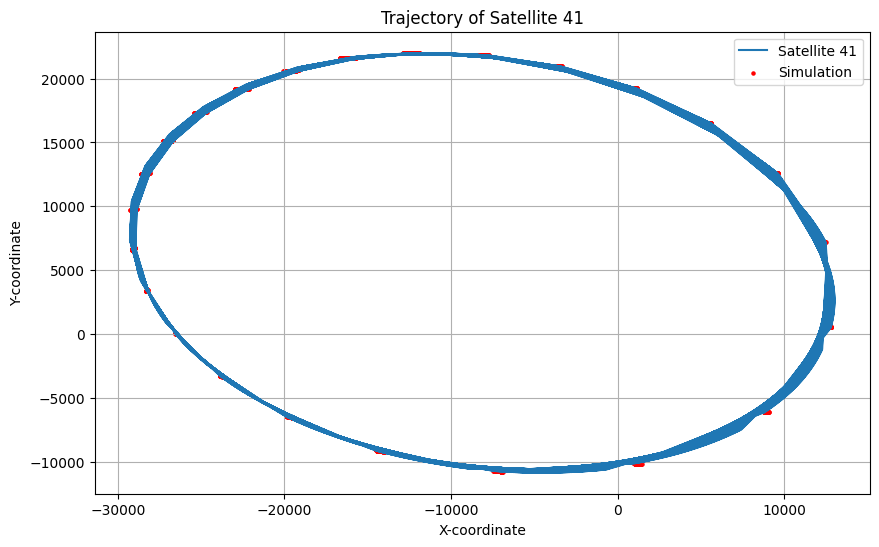

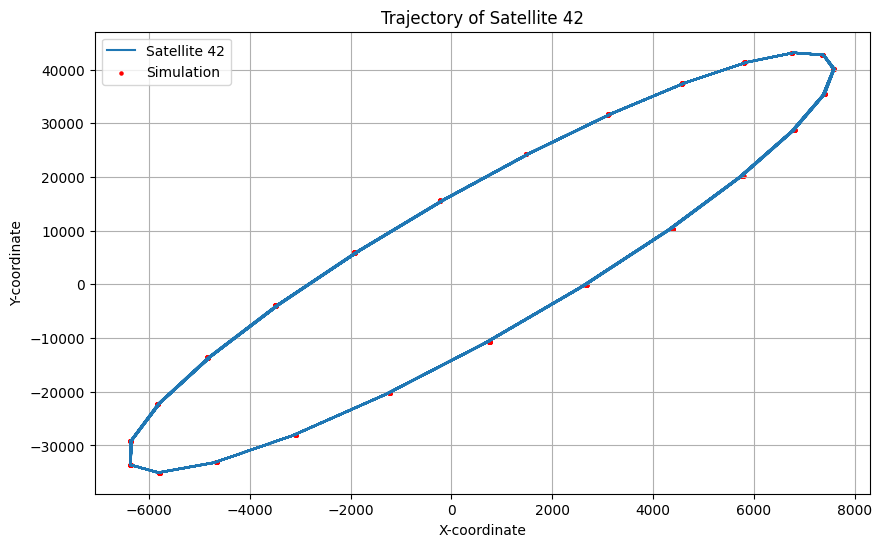

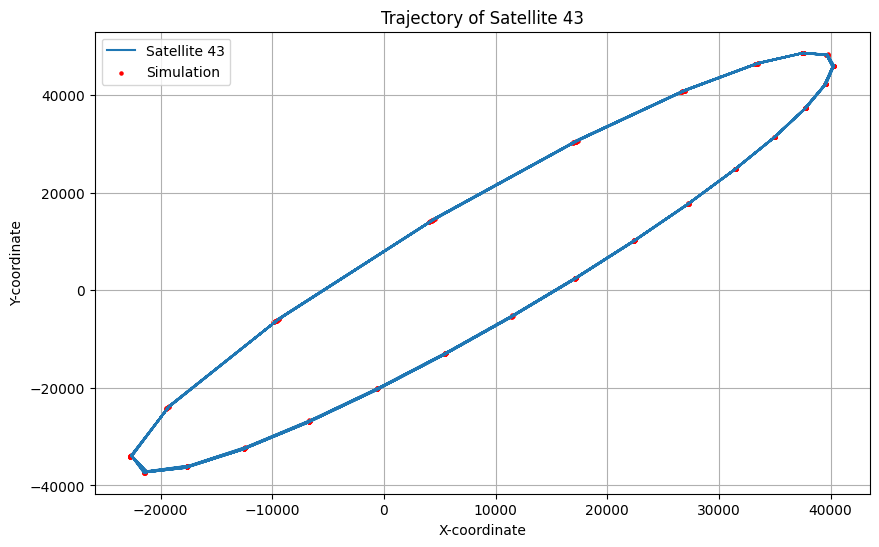

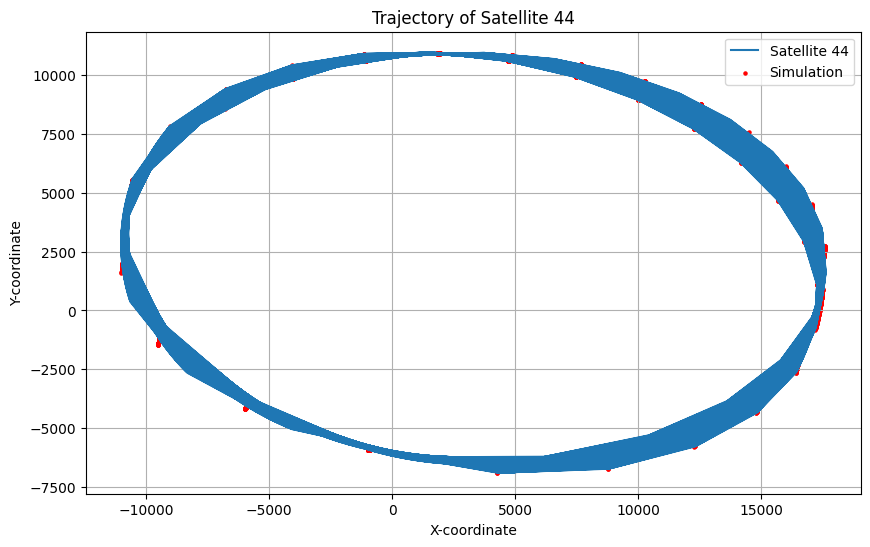

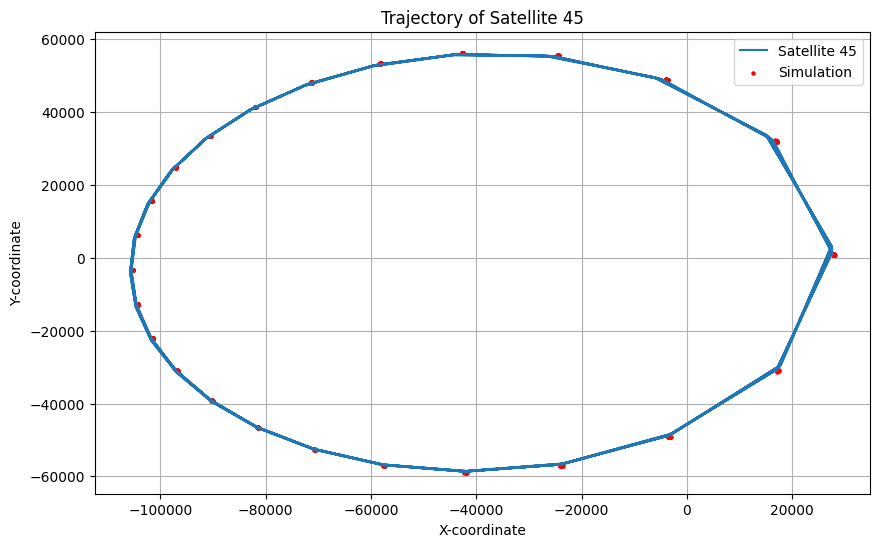

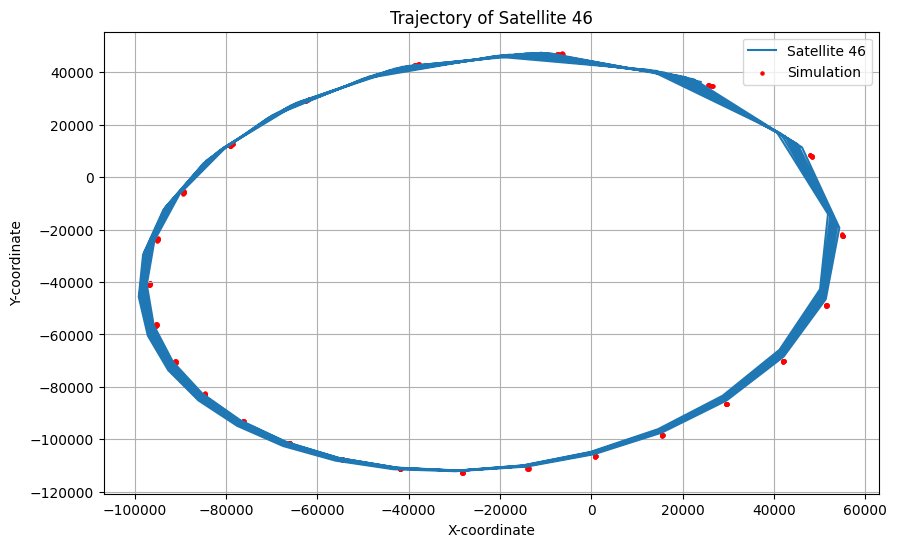

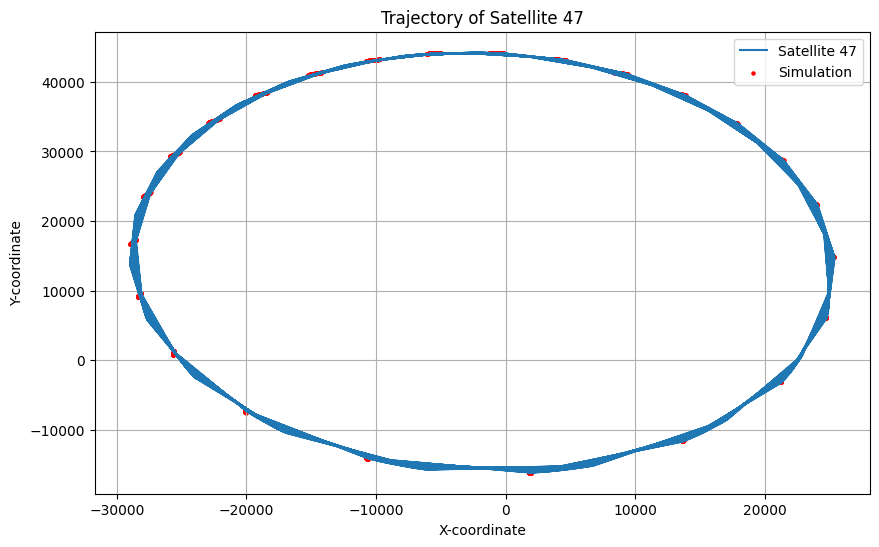

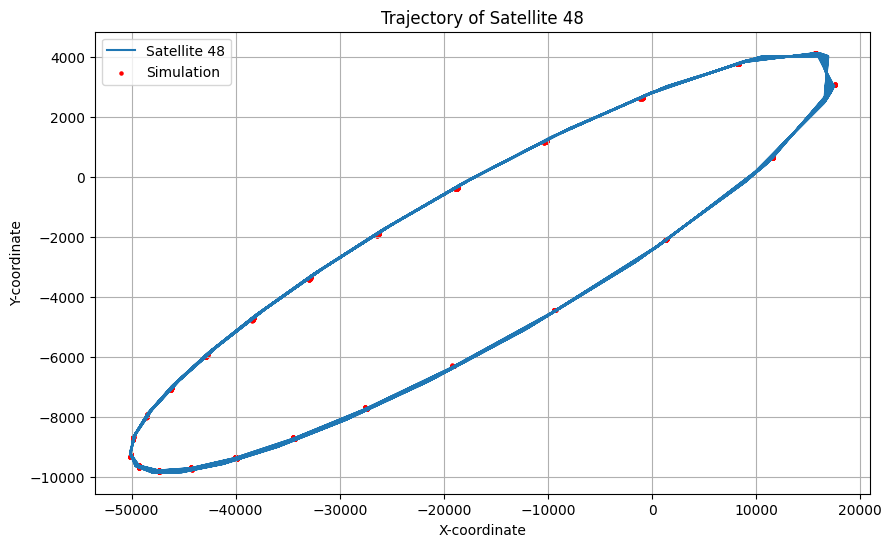

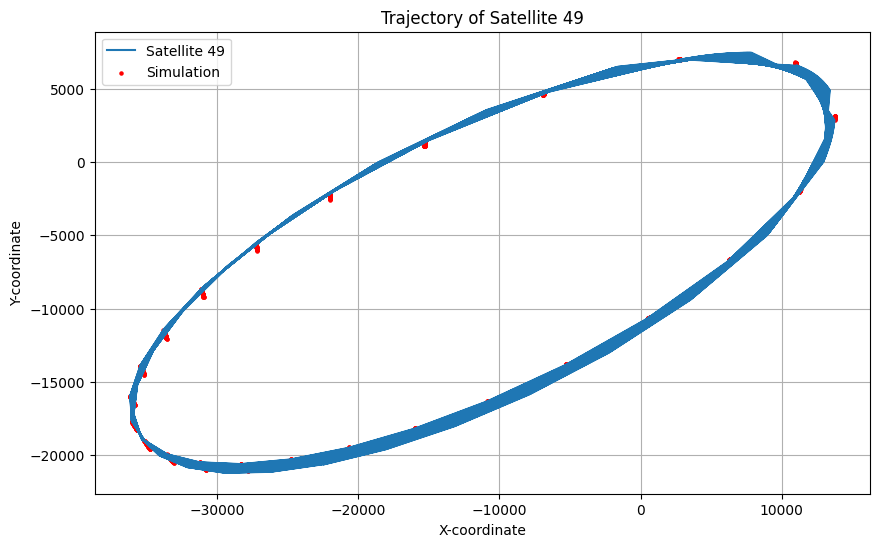

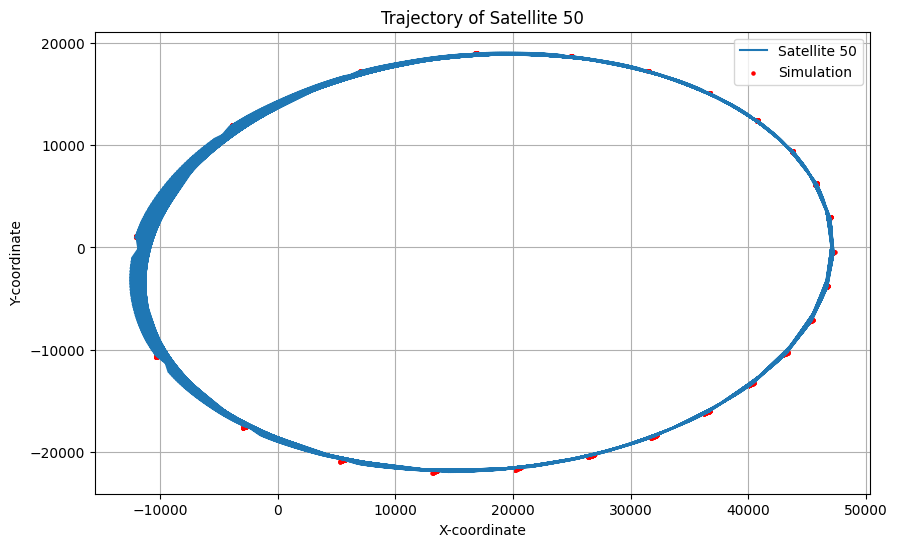

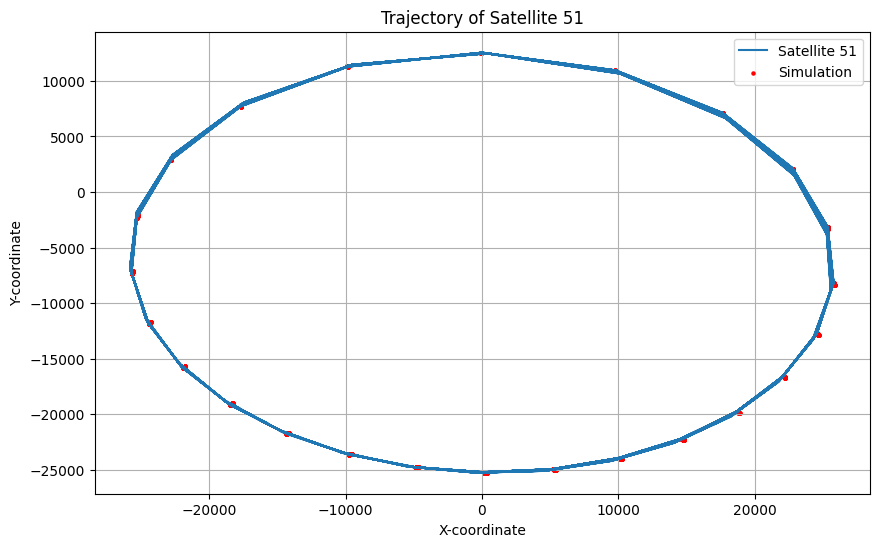

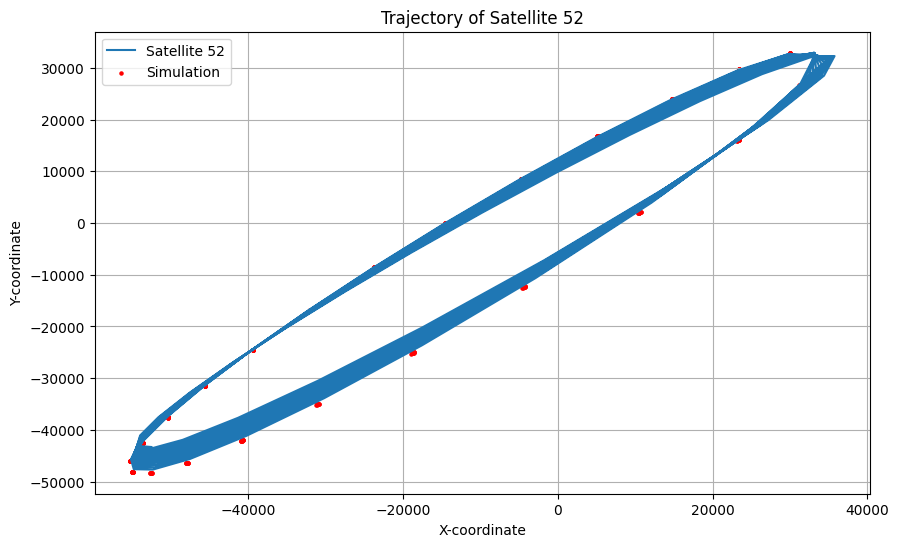

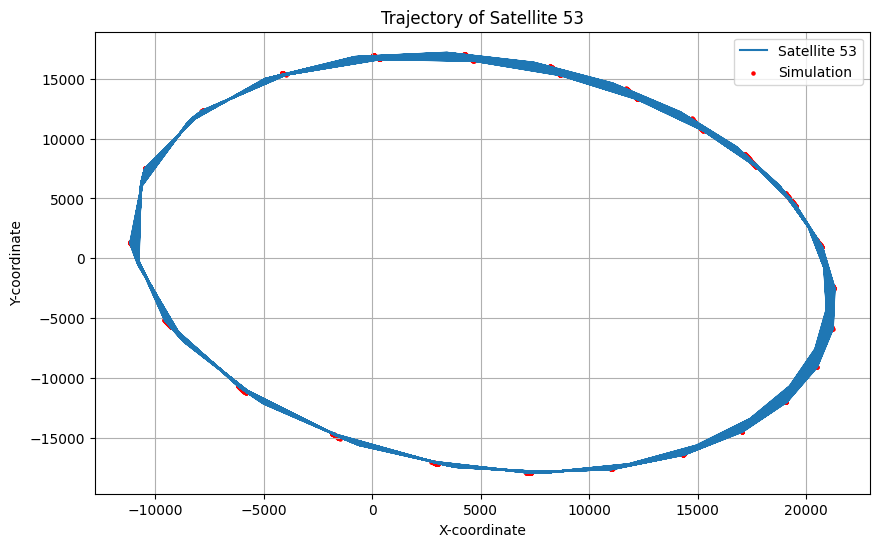

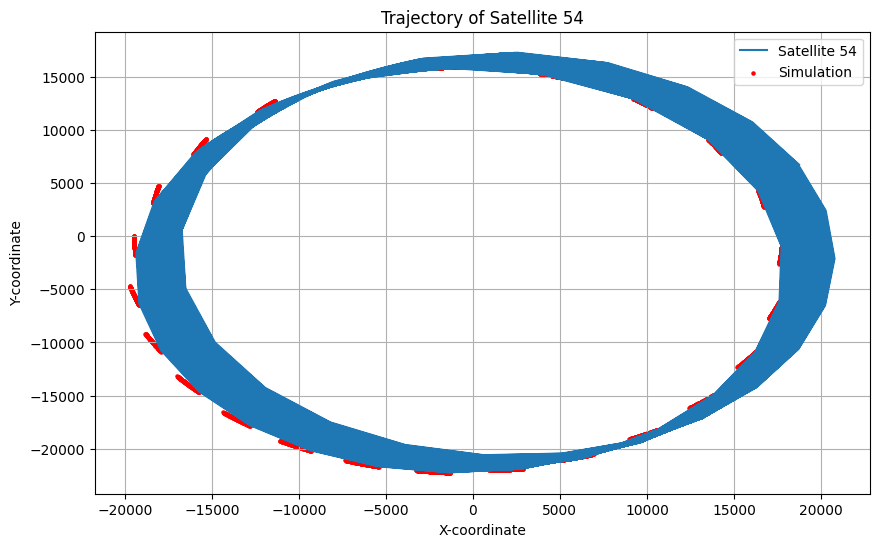

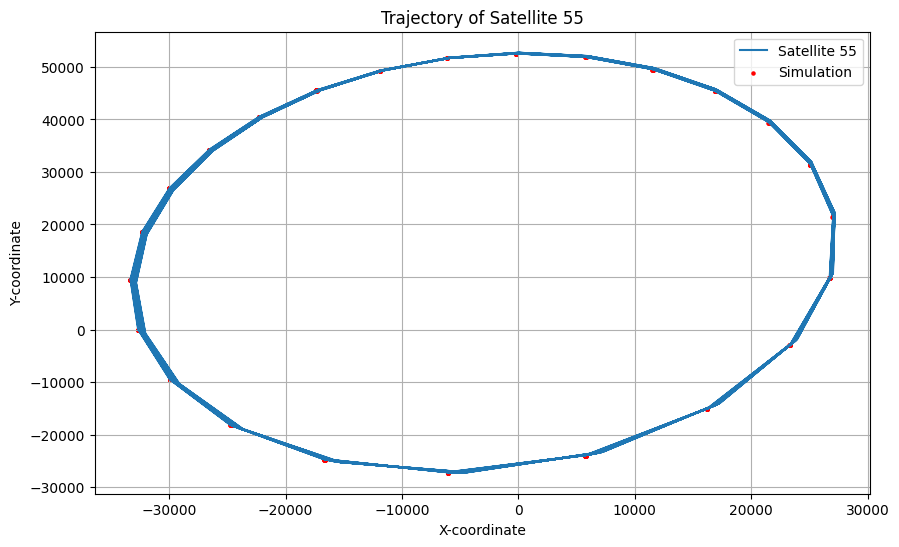

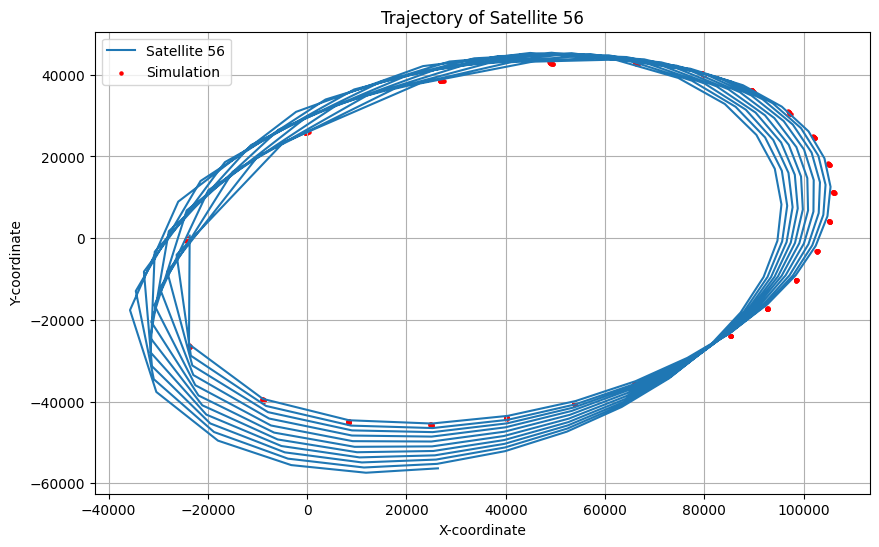

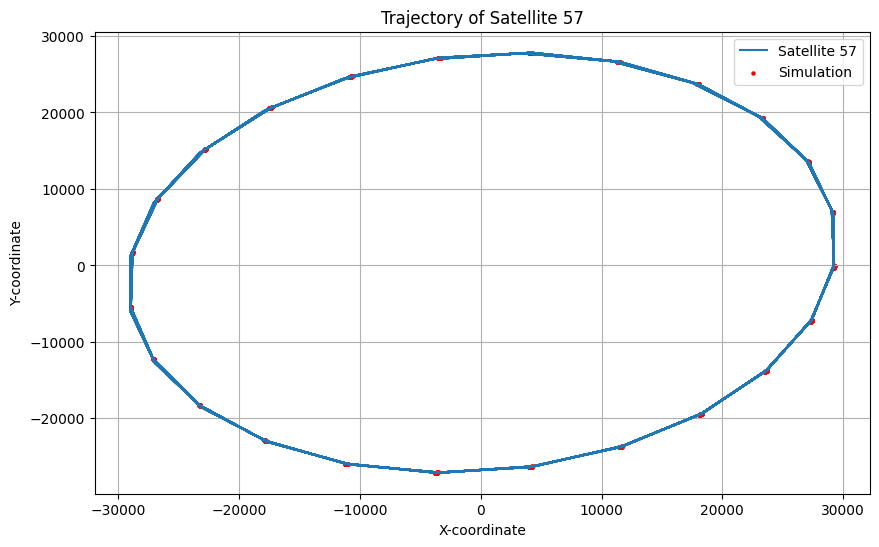

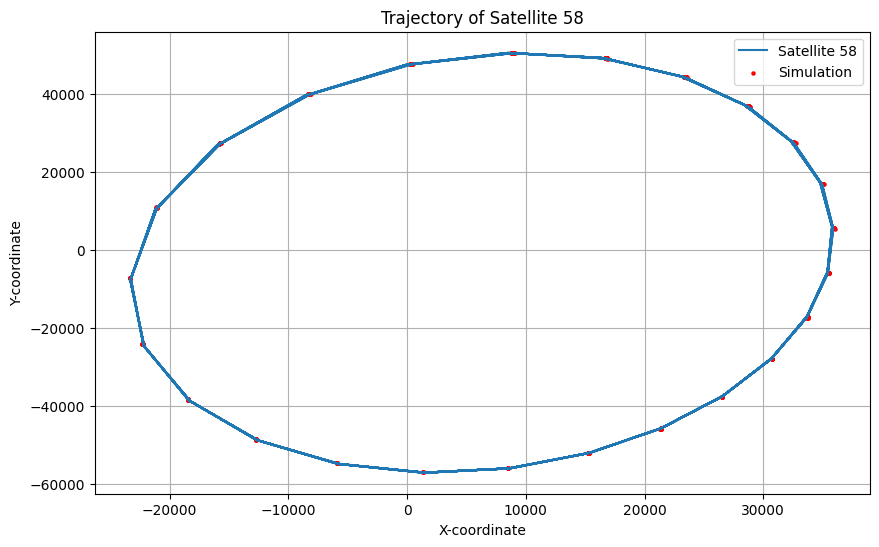

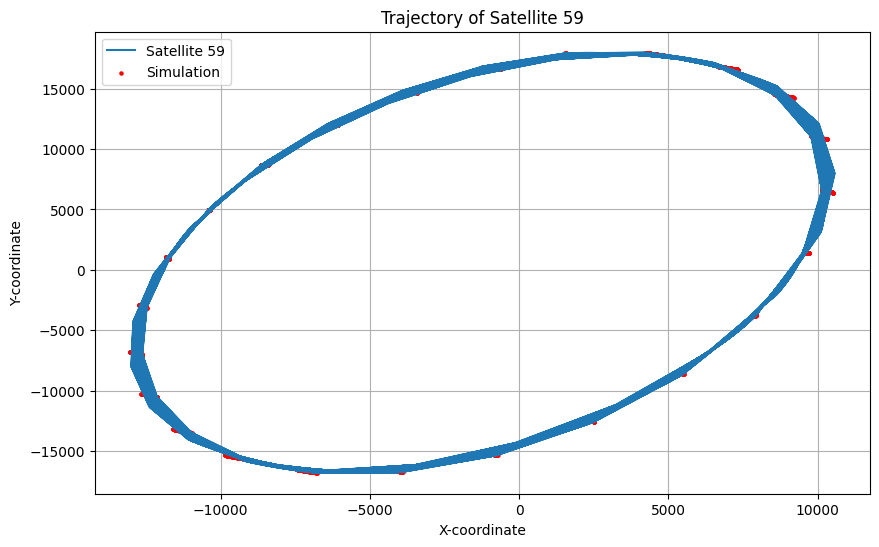

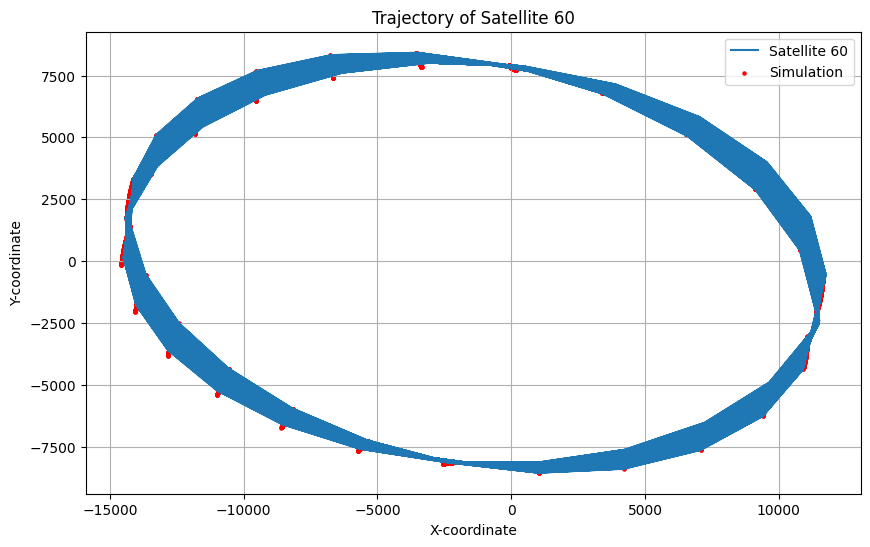

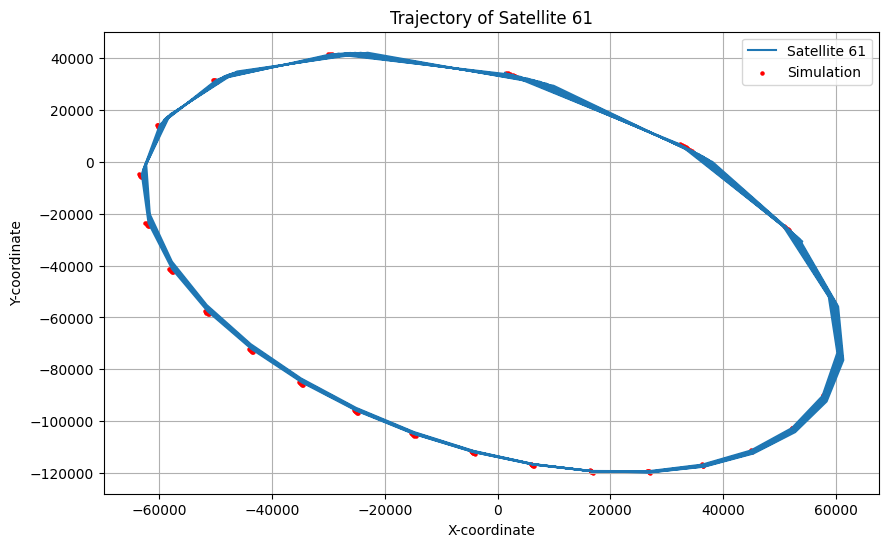

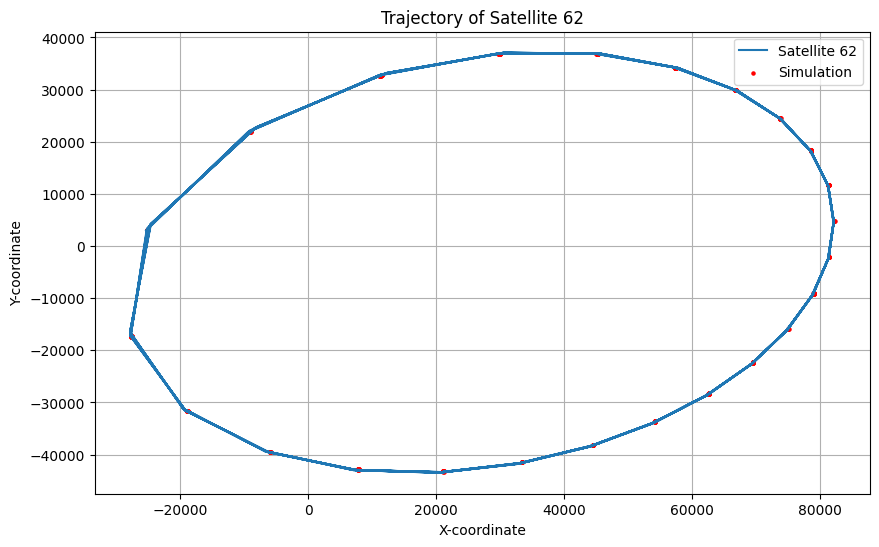

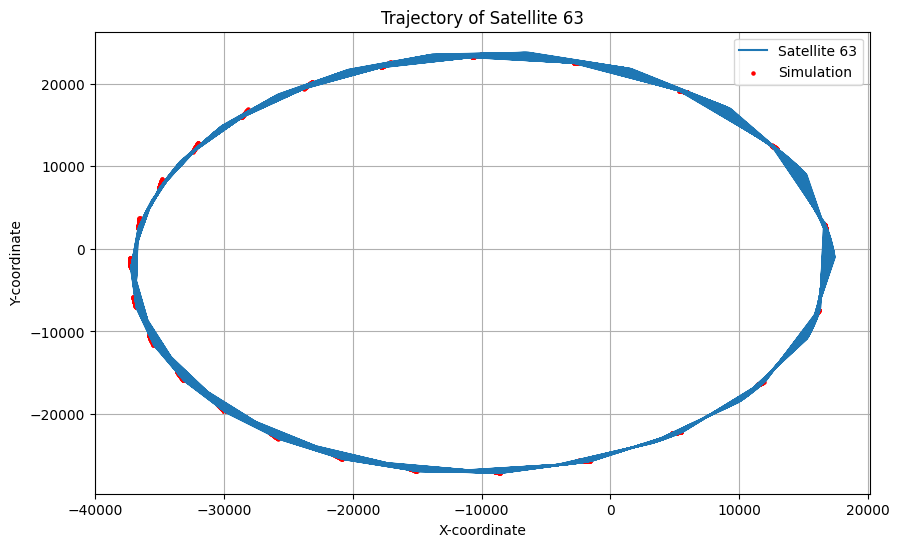

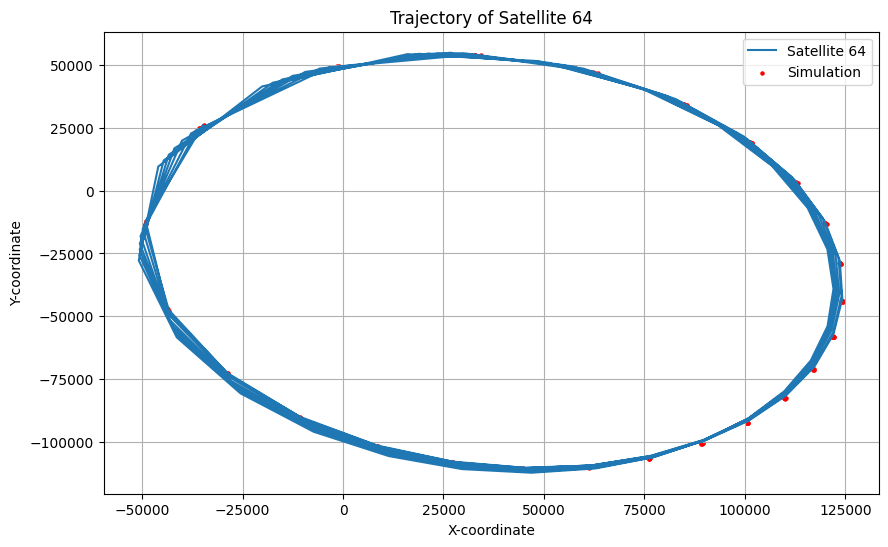

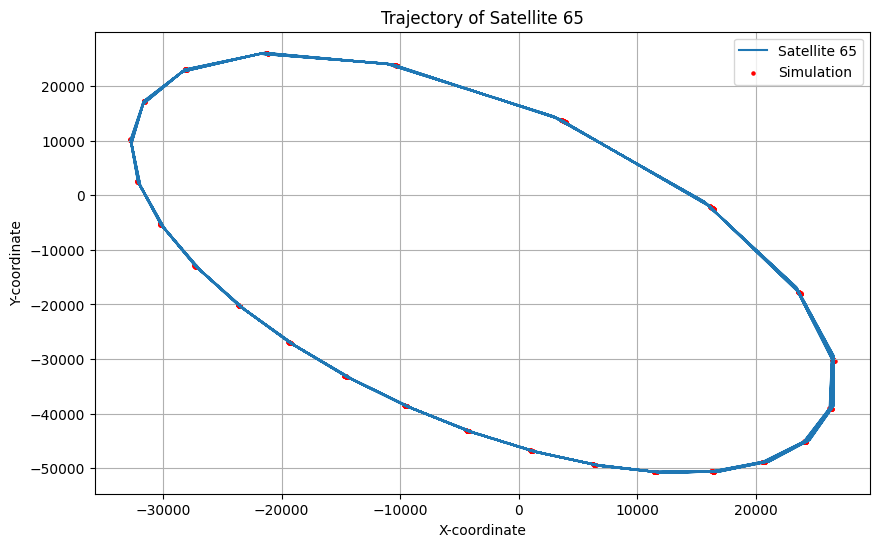

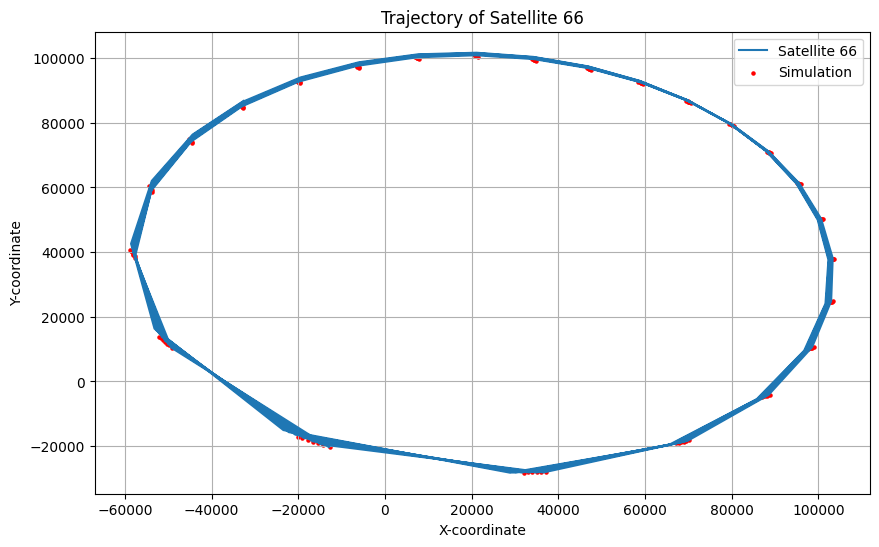

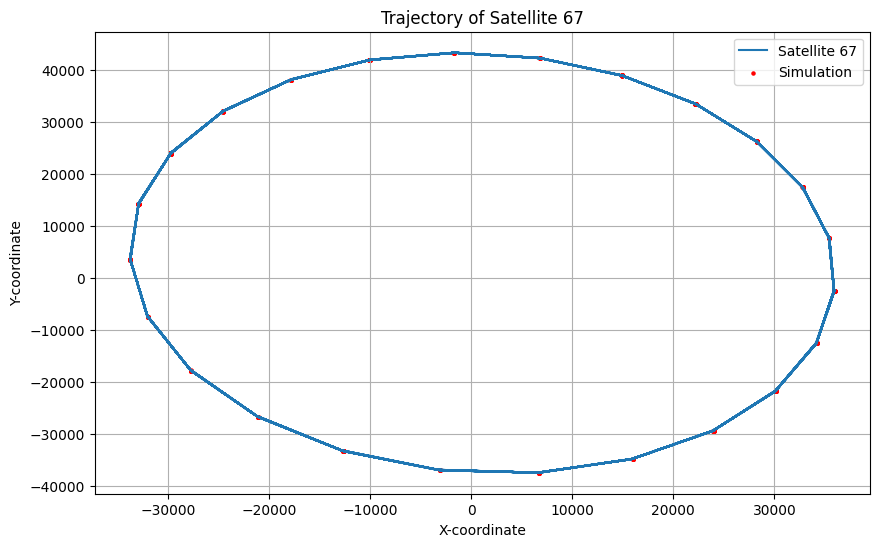

KeyboardInterrupt: ignored

In [ ]:
# Plot trajectories for each sat_id
unique_satellites = df['sat_id'].unique()

for sat_id in unique_satellites:
    satellite_data = df[df['sat_id'] == sat_id]

    plt.figure(figsize=(10, 6))
    plt.plot(satellite_data['x'], satellite_data['y'], label=f'Satellite {sat_id}')
    plt.scatter(satellite_data['x_sim'], satellite_data['y_sim'], marker='o', s=5, color='red', label='Simulation')
    plt.title(f'Trajectory of Satellite {sat_id}')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()


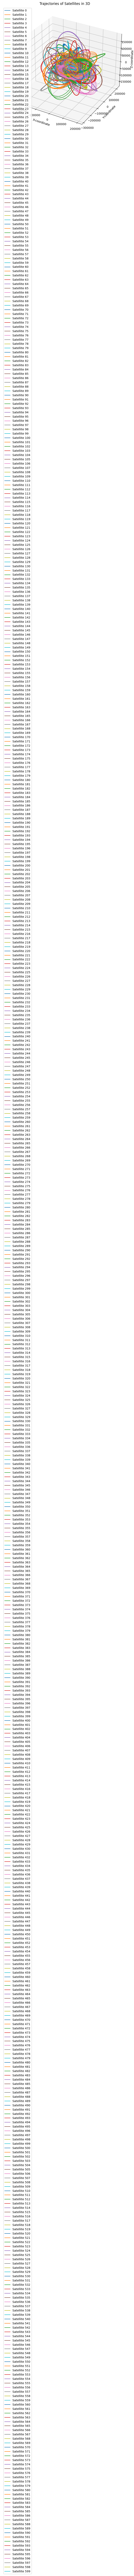

In [ ]:
# Plot trajectories for each sat_id in 3D
unique_satellites = df['sat_id'].unique()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for sat_id in unique_satellites:
    satellite_data = df[df['sat_id'] == sat_id]

    ax.plot(satellite_data['x'], satellite_data['y'], satellite_data['z'], label=f'Satellite {sat_id}')
    #x.scatter(satellite_data['x_sim'], satellite_data['y_sim'], satellite_data['z_sim'], marker='o', s=5, color='red', label='Simulation')

ax.set_title('Trajectories of Satellites in 3D')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()
plt.show()


In [ ]:
selected_satellites = [0, 4, 8, 35]
new_df = df[df['sat_id'].isin(selected_satellites)].copy()

r1,c1 = new_df.shape
print('The dataset has {} rows and {} columns'.format(r1,c1))
new_df


The dataset has 3915 rows and 14 columns


epoch  sat_id             x              y  \
id                                                                    
0      2014-01-01 00:00:00.000       0  -8855.823863   13117.780146   
1      2014-01-01 00:46:43.000       0 -10567.672384    1619.746066   
2      2014-01-01 01:33:26.001       0 -10578.684043  -10180.467460   
3      2014-01-01 02:20:09.001       0  -9148.251857  -20651.437460   
4      2014-01-01 03:06:52.002       0  -6719.092336  -28929.061629   
...                        ...     ...           ...            ...   
62578  2014-01-24 13:52:46.934      35   5565.490617  107842.052817   
62579  2014-01-24 16:16:38.997      35   8824.612443  110157.497406   
62580  2014-01-24 18:40:31.060      35  11871.922136  110073.442026   
62581  2014-01-24 21:04:23.123      35  14647.245490  107659.152473   
62582  2014-01-24 23:28:15.187      35  17090.832544  102966.226296   

                  z        Vx        Vy        Vz         x_sim         y_sim  \
id                                                                              
0     -20728.353233 -0.908303 -3.808436 -2.022083  -8843.131454  13138.221690   
1     -24451.813271 -0.302590 -4.272617 -0.612796 -10555.500066   1649.289367   
2     -24238.280949  0.277435 -4.047522  0.723155 -10571.858472 -10145.939908   
3     -20720.381279  0.715600 -3.373762  1.722115  -9149.620794 -20618.200201   
4     -14938.907967  0.992507 -2.519732  2.344703  -6729.358857 -28902.271436   
...             ...       ...       ...       ...           ...           ...   
62578   9884.182285  0.387396  0.410464 -1.369112  10507.611548  70329.201409   
62579  -1996.542484  0.366481  0.127728 -1.378297  14466.689967  55813.980351   
62580 -13823.962528  0.338410 -0.145870 -1.357194  16695.670692  34863.632984   
62581 -25344.890024  0.303470 -0.412516 -1.307386  15933.594818   7994.165482   
62582 -36311.532799  0.261482 -0.674104 -1.228565  11119.124896 -20560.339782   

              z_sim    Vx_sim    Vy_sim    Vz_sim  
id                                                 
0     -20741.615306 -0.907527 -3.804930 -2.024133  
1     -24473.089556 -0.303704 -4.269816 -0.616468  
2     -24271.169776  0.274880 -4.046788  0.718768  
3     -20765.019094  0.712437 -3.375202  1.718306  
4     -14992.399986  0.989382 -2.522618  2.342237  
...             ...       ...       ...       ...  
62578 -10180.278915  0.521642 -1.335801 -1.942653  
62579 -26226.810048  0.379031 -2.043999 -1.731057  
62580 -39063.822569  0.111983 -2.804527 -1.166531  
62581 -44803.971940 -0.313281 -3.341025 -0.066819  
62582 -39045.069344 -0.788631 -3.104387  1.411250  

[3915 rows x 14 columns]

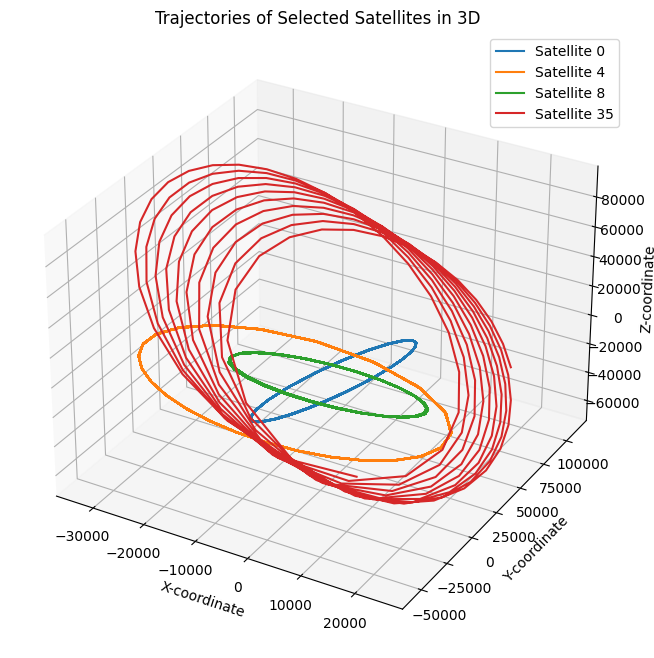

In [ ]:
selected_satellites = [0, 4, 8, 35]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for sat_id in selected_satellites:
    satellite_data = new_df[new_df['sat_id'] == sat_id]

    ax.plot(satellite_data['x'], satellite_data['y'], satellite_data['z'], label=f'Satellite {sat_id}')
   # ax.scatter(satellite_data['x_sim'], satellite_data['y_sim'], satellite_data['z_sim'], marker='o', s=5, color='red', label='Simulation')

ax.set_title('Trajectories of Selected Satellites in 3D')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()
plt.show()


In [ ]:
new_df_1 = new_df[["epoch","sat_id", "x", "y", "z"]]

In [ ]:
new_df_1

epoch  sat_id             x              y  \
id                                                                    
0      2014-01-01 00:00:00.000       0  -8855.823863   13117.780146   
1      2014-01-01 00:46:43.000       0 -10567.672384    1619.746066   
2      2014-01-01 01:33:26.001       0 -10578.684043  -10180.467460   
3      2014-01-01 02:20:09.001       0  -9148.251857  -20651.437460   
4      2014-01-01 03:06:52.002       0  -6719.092336  -28929.061629   
...                        ...     ...           ...            ...   
62578  2014-01-24 13:52:46.934      35   5565.490617  107842.052817   
62579  2014-01-24 16:16:38.997      35   8824.612443  110157.497406   
62580  2014-01-24 18:40:31.060      35  11871.922136  110073.442026   
62581  2014-01-24 21:04:23.123      35  14647.245490  107659.152473   
62582  2014-01-24 23:28:15.187      35  17090.832544  102966.226296   

                  z  
id                   
0     -20728.353233  
1     -24451.813271  
2     -24238.280949  
3     -20720.381279  
4     -14938.907967  
...             ...  
62578   9884.182285  
62579  -1996.542484  
62580 -13823.962528  
62581 -25344.890024  
62582 -36311.532799  

[3915 rows x 5 columns]

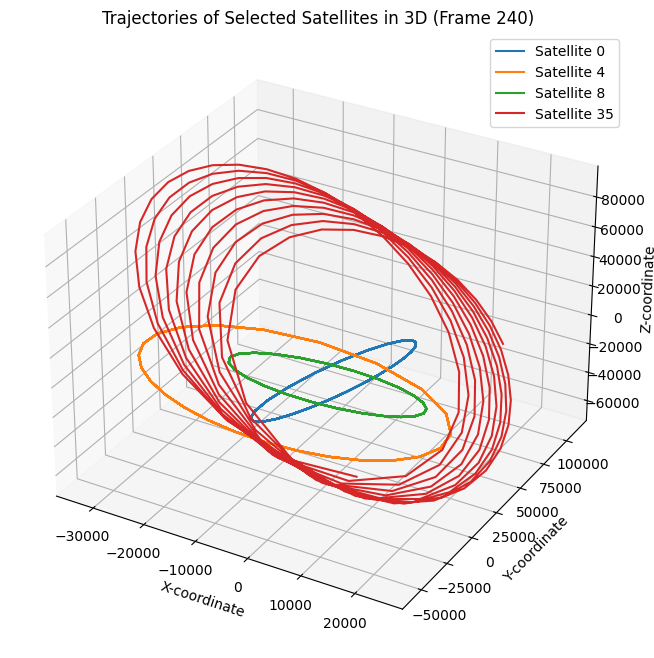

In [ ]:
def update(frame):
    ax.cla()
    ax.set_title(f'Trajectories of Selected Satellites in 3D (Frame {frame})')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_zlabel('Z-coordinate')

    for sat_id in selected_satellites:
        satellite_data = new_df[new_df['sat_id'] == sat_id][:frame]

        ax.plot(satellite_data['x'], satellite_data['y'], satellite_data['z'], label=f'Satellite {sat_id}')
        #ax.scatter(satellite_data['x_sim'], satellite_data['y_sim'], satellite_data['z_sim'], marker='o', s=5, color='red', label='Simulation')

    ax.legend()

selected_satellites = [0, 4, 8, 35]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

num_frames = min(new_df[new_df['sat_id'].isin(selected_satellites)].groupby('sat_id').size())
animation = FuncAnimation(fig, update, frames=num_frames, interval=200, repeat=False)
animation.save('animation.mp4', writer='ffmpeg', fps=10, dpi=300)

plt.show()


In [ ]:
new_df_1["epoch"] = pd.to_datetime(new_df_1["epoch"])

<ipython-input-87-3ccfc96508d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1["epoch"] = pd.to_datetime(new_df_1["epoch"])


In [ ]:
new_df_1['epoch'].max() - new_df_1['epoch'].min()

Timedelta('23 days 23:54:53.410000')

The 'epoch' values are converted to integers (nanoseconds since the epoch) and then divided by 10^9 to convert them to seconds. The resulting cubic splines can be used for interpolation of the satellite's x, y, and z coordinates over time.

In [ ]:
def interpolate_satellite_coordinates(dataframe, sat_id):
    sat_df = dataframe[dataframe['sat_id'] == sat_id]

    sat_df['rounded_epoch'] = sat_df['epoch'].round('1s')
    sat_df = sat_df.drop_duplicates(subset='rounded_epoch')
    sat_df = sat_df.sort_values(by='epoch')

    t_numeric = sat_df['epoch'].astype(np.int64) // 10**9
    cs_x = CubicSpline(t_numeric, sat_df['x'])
    cs_y = CubicSpline(t_numeric, sat_df['y'])
    cs_z = CubicSpline(t_numeric, sat_df['z'])

    return cs_x, cs_y, cs_z

# for sat_id 0
sat_id = 0
sat_0_x, sat_0_y, sat_0_z = interpolate_satellite_coordinates(new_df_1, sat_id)


<ipython-input-89-09aa37f4eea6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_df['rounded_epoch'] = sat_df['epoch'].round('1s')


In [ ]:
# for sat_id 4
sat_id = 4
sat_4_x, sat_4_y, sat_4_z = interpolate_satellite_coordinates(new_df_1, sat_id)

<ipython-input-89-09aa37f4eea6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_df['rounded_epoch'] = sat_df['epoch'].round('1s')


In [ ]:
# for sat_id 8
sat_id = 8
sat_8_x, sat_8_y, sat_8_z = interpolate_satellite_coordinates(new_df_1, sat_id)

<ipython-input-89-09aa37f4eea6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_df['rounded_epoch'] = sat_df['epoch'].round('1s')


In [ ]:
# for sat_id 35
sat_id = 35
sat_35_x, sat_35_y, sat_35_z = interpolate_satellite_coordinates(new_df_1, sat_id)

<ipython-input-89-09aa37f4eea6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_df['rounded_epoch'] = sat_df['epoch'].round('1s')


In [ ]:
def print_polynomial_expressions(breakpoints, coefficients_x, coefficients_y, coefficients_z):
    for i in range(len(breakpoints) - 1):
        a_x, b_x, c_x, d_x = coefficients_x[:, i]
        a_y, b_y, c_y, d_y = coefficients_y[:, i]
        a_z, b_z, c_z, d_z = coefficients_z[:, i]

        print(f"Segment {i + 1} (from {breakpoints[i]} to {breakpoints[i + 1]} seconds):")

        # polynomial expression
        polynomial_x = f"{d_x} + ({c_x})*(x-{breakpoints[i]}) + ({b_x})*(x-{breakpoints[i]})**2 + ({a_x})*(x-{breakpoints[i]})**3"
        polynomial_y = f"{d_y} + ({c_y})*(x-{breakpoints[i]}) + ({b_y})*(x-{breakpoints[i]})**2 + ({a_y})*(x-{breakpoints[i]})**3"
        polynomial_z = f"{d_z} + ({c_z})*(x-{breakpoints[i]}) + ({b_z})*(x-{breakpoints[i]})**2 + ({a_z})*(x-{breakpoints[i]})**3"

        print("Polynomial expression for x:")
        print(polynomial_x)

        print("Polynomial expression for y:")
        print(polynomial_y)

        print("Polynomial expression for z:")
        print(polynomial_z)

        print("\n")

In [ ]:
#  for satellite 0
breakpoints = sat_0_x.x
coefficients_x = sat_0_x.c
coefficients_y = sat_0_y.c
coefficients_z = sat_0_z.c

print_polynomial_expressions(breakpoints, coefficients_x, coefficients_y, coefficients_z)

Streaming output truncated to the last 5000 lines.
-2226.5033719808803 + (2.653034101950324)*(x-1389047349.0) + (5.594264866450881e-06)*(x-1389047349.0)**2 + (-2.2605671480417046e-09)*(x-1389047349.0)**3
Polynomial expression for z:
39979.954657342205 + (-0.28242309491119927)*(x-1389047349.0) + (-9.604060250142159e-05)*(x-1389047349.0)**2 + (-6.950548444835523e-10)*(x-1389047349.0)**3


Segment 185 (from 1389050152.0 to 1389052955.0 seconds):
Polynomial expression for x:
16698.87293309779 + (-0.33635148581363894)*(x-1389050152.0) + (-4.4276045751762934e-05)*(x-1389050152.0)**2 + (-2.6937323462849557e-10)*(x-1389050152.0)**3
Polynomial expression for y:
5204.120639725304 + (2.631113017850132)*(x-1389050152.0) + (-1.3414844281432447e-05)*(x-1389050152.0)**2 + (-2.7928588279256822e-09)*(x-1389050152.0)**3
Polynomial expression for z:
38418.44311262668 + (-0.8372094520070648)*(x-1389050152.0) + (-0.00010188531868868378)*(x-1389050152.0)**2 + (-5.569826806608884e-10)*(x-1389050152.0)**3


S

In [ ]:
#  for satellite 4
breakpoints = sat_4_x.x
coefficients_x = sat_4_x.c
coefficients_y = sat_4_y.c
coefficients_z = sat_4_z.c

print_polynomial_expressions(breakpoints, coefficients_x, coefficients_y, coefficients_z)

Streaming output truncated to the last 5000 lines.
-7696.7156859477245 + (1.7201218221973904)*(x-1389373484.0) + (3.978236114999741e-05)*(x-1389373484.0)**2 + (-2.288241340017304e-09)*(x-1389373484.0)**3
Polynomial expression for z:
-3023.274677247266 + (2.708671275331547)*(x-1389373484.0) + (1.6393322942041507e-05)*(x-1389373484.0)**2 + (-5.121840813999636e-09)*(x-1389373484.0)**3


Segment 380 (from 1389375704.0 to 1389377924.0 seconds):
Polynomial expression for x:
-31124.680745226568 + (1.2245034062207885)*(x-1389375704.0) + (0.00019840411955804053)*(x-1389375704.0)**2 + (4.849439728420135e-09)*(x-1389375704.0)**3
Polynomial expression for y:
-3707.017610314584 + (1.862923399842955)*(x-1389375704.0) + (2.4542673825481567e-05)*(x-1389375704.0)**2 + (-3.996291448979548e-09)*(x-1389375704.0)**3
Polynomial expression for z:
3014.730100581997 + (2.705730188391064)*(x-1389375704.0) + (-1.7718136879196466e-05)*(x-1389375704.0)**2 + (-7.994449188025429e-09)*(x-1389375704.0)**3


Segment 38

In [ ]:
#  for satellite 8
breakpoints = sat_8_x.x
coefficients_x = sat_8_x.c
coefficients_y = sat_8_y.c
coefficients_z = sat_8_z.c

print_polynomial_expressions(breakpoints, coefficients_x, coefficients_y, coefficients_z)

Streaming output truncated to the last 5000 lines.
-4312.3638329885525 + (-0.9098160880534507)*(x-1390029694.0) + (0.0001727061797501419)*(x-1390029694.0)**2 + (9.109119287665692e-09)*(x-1390029694.0)**3
Polynomial expression for z:
3733.935352150625 + (4.723561696020235)*(x-1390029694.0) + (-0.0001494442746705898)*(x-1390029694.0)**2 + (-5.949845051712256e-08)*(x-1390029694.0)**3


Segment 1441 (from 1390030733.0 to 1390031772.0 seconds):
Polynomial expression for x:
-14085.47875153528 + (2.5969172083538172)*(x-1390030733.0) + (0.000558793374288533)*(x-1390030733.0)**2 + (-4.458576061517143e-08)*(x-1390030733.0)**3
Polynomial expression for y:
-5061.005809106556 + (-0.5214321898450353)*(x-1390030733.0) + (0.00020109930456979603)*(x-1390030733.0)**2 + (2.419267613835087e-09)*(x-1390030733.0)**3
Polynomial expression for z:
8413.652931433058 + (4.220327012852665)*(x-1390030733.0) + (-0.00033490094493246)*(x-1390030733.0)**2 + (-4.655644982103141e-08)*(x-1390030733.0)**3


Segment 1442 (

In [ ]:
#  for satellite 35
breakpoints = sat_35_x.x
coefficients_x = sat_35_x.c
coefficients_y = sat_35_y.c
coefficients_z = sat_35_z.c

print_polynomial_expressions(breakpoints, coefficients_x, coefficients_y, coefficients_z)

Segment 1 (from 1388534400.0 to 1388543032.0 seconds):
Polynomial expression for x:
10905.24668052885 + (-0.8200836814109288)*(x-1388534400.0) + (-2.019573732984721e-05)*(x-1388534400.0)**2 + (5.631888324331505e-10)*(x-1388534400.0)**3
Polynomial expression for y:
-20344.97485540669 + (-3.2798689880168226)*(x-1388534400.0) + (7.985845892212772e-05)*(x-1388534400.0)**2 + (-2.068313863196311e-10)*(x-1388534400.0)**3
Polynomial expression for z:
-38570.19695269503 + (1.4478390828328784)*(x-1388534400.0) + (8.408033475434098e-05)*(x-1388534400.0)**2 + (-1.7364848540873714e-09)*(x-1388534400.0)**3


Segment 2 (from 1388543032.0 to 1388551664.0 seconds):
Polynomial expression for x:
2683.7044596884 + (-1.042850885016937)*(x-1388543032.0) + (-5.611399325158256e-06)*(x-1388543032.0)**2 + (5.631888324331386e-10)*(x-1388543032.0)**3
Polynomial expression for y:
-42839.466818524685 + (-1.947426456552919)*(x-1388543032.0) + (7.45023533419946e-05)*(x-1388543032.0)**2 + (-2.068313863196311e-10)*(x-1

In [ ]:
# interpolate position at a specific epoch of satellite 0
interpolation_epoch = pd.to_datetime('2014-01-24 22:10:15.285')
interpolated_sat_0_x = sat_0_x(interpolation_epoch.timestamp())
interpolated_sat_0_y = sat_0_y(interpolation_epoch.timestamp())
interpolated_sat_0_z = sat_0_z(interpolation_epoch.timestamp())

print(f'Interpolated Position at {interpolation_epoch}:')
print(f'x: {interpolated_sat_0_x}, y: {interpolated_sat_0_y}, z: {interpolated_sat_0_z}')

Interpolated Position at 2014-01-24 22:10:15.285000:
x: 14844.878434261283, y: 14726.456330232406, z: 33731.865797132275


In [ ]:
# interpolate  position at a specific epoch of satellite 4
interpolation_epoch = pd.to_datetime('2014-01-24 22:10:15.285')
interpolated_sat_4_x = sat_4_x(interpolation_epoch.timestamp())
interpolated_sat_4_y = sat_4_y(interpolation_epoch.timestamp())
interpolated_sat_4_z = sat_4_z(interpolation_epoch.timestamp())

print(f'Interpolated Position at {interpolation_epoch}:')
print(f'x: {interpolated_sat_4_x}, y: {interpolated_sat_4_y}, z: {interpolated_sat_4_z}')

Interpolated Position at 2014-01-24 22:10:15.285000:
x: -30841.14973041562, y: -3526.4400973545858, z: 3614.4088537829275


In [ ]:
# interpolate  position at a specific epoch of satellite 8
interpolation_epoch = pd.to_datetime('2014-01-24 22:10:15.285')
interpolated_sat_8_x = sat_8_x(interpolation_epoch.timestamp())
interpolated_sat_8_y = sat_8_y(interpolation_epoch.timestamp())
interpolated_sat_8_z = sat_8_z(interpolation_epoch.timestamp())

print(f'Interpolated Position at {interpolation_epoch}:')
print(f'x: {interpolated_sat_8_x}, y: {interpolated_sat_8_y}, z: {interpolated_sat_8_z}')

Interpolated Position at 2014-01-24 22:10:15.285000:
x: -16391.480271607994, y: -2106.425907220375, z: -4705.566880618364


In [ ]:
# interpolate  position at a specific epoch of satellite 35
interpolation_epoch = pd.to_datetime('2014-01-24 22:10:15.285')
interpolated_sat_35_x = sat_35_x(interpolation_epoch.timestamp())
interpolated_sat_35_y = sat_35_y(interpolation_epoch.timestamp())
interpolated_sat_35_z = sat_35_z(interpolation_epoch.timestamp())

print(f'Interpolated Position at {interpolation_epoch}:')
print(f'x: {interpolated_sat_35_x}, y: {interpolated_sat_35_y}, z: {interpolated_sat_35_z}')

Interpolated Position at 2014-01-24 22:10:15.285000:
x: 15810.903350300803, y: 105790.35112340702, z: -30450.008932459732


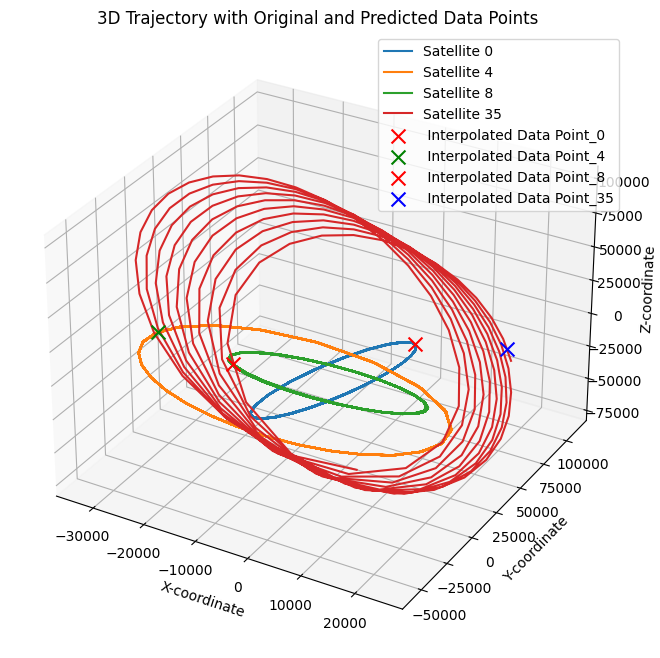

In [ ]:
selected_satellites = [0, 4, 8, 35]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for sat_id in selected_satellites:
    satellite_data = new_df[new_df['sat_id'] == sat_id]

    ax.plot(satellite_data['x'], satellite_data['y'], satellite_data['z'], label=f'Satellite {sat_id}')
   # ax.scatter(satellite_data['x_sim'], satellite_data['y_sim'], satellite_data['z_sim'], marker='o', s=5, color='red', label='Simulation')


ax.scatter(interpolated_sat_0_x, interpolated_sat_0_y, interpolated_sat_0_z, c='red', marker='x', s=100, label=' Interpolated Data Point_0')
ax.scatter(interpolated_sat_4_x, interpolated_sat_4_y, interpolated_sat_4_z, c='green', marker='x', s=100, label=' Interpolated Data Point_4')
ax.scatter(interpolated_sat_8_x, interpolated_sat_8_y, interpolated_sat_8_z, c='red', marker='x', s=100, label=' Interpolated Data Point_8')
ax.scatter(interpolated_sat_35_x, interpolated_sat_35_y, interpolated_sat_35_z, c='blue', marker='x', s=100, label=' Interpolated Data Point_35')



ax.set_title('3D Trajectory with Original and Predicted Data Points')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_zlabel('Z-coordinate')
ax.legend()
plt.show()


In [ ]:
# Function to update the plot for each frame in the animation
def update(frame):
    ax.cla()  # Clear the previous frame
    ax.set_title(f'3D Trajectory (Frame {frame})')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_zlabel('Z-coordinate')

    for sat_id in selected_satellites:
        satellite_data = new_df[new_df['sat_id'] == sat_id][:frame]
        ax.plot(satellite_data['x'], satellite_data['y'], satellite_data['z'], label=f'Satellite {sat_id}')

    # Plot interpolated data points if available
    if frame < len(interpolated_sat_0_x):
        ax.scatter(interpolated_sat_0_x[frame], interpolated_sat_0_y[frame], interpolated_sat_0_z[frame], c='red', marker='x', s=100, label='Interpolated Data Point_0')
    if frame < len(interpolated_sat_4_x):
        ax.scatter(interpolated_sat_4_x[frame], interpolated_sat_4_y[frame], interpolated_sat_4_z[frame], c='green', marker='x', s=100, label='Interpolated Data Point_4')
    if frame < len(interpolated_sat_8_x):
        ax.scatter(interpolated_sat_8_x[frame], interpolated_sat_8_y[frame], interpolated_sat_8_z[frame], c='red', marker='x', s=100, label='Interpolated Data Point_8')
    if frame < len(interpolated_sat_35_x):
        ax.scatter(interpolated_sat_35_x[frame], interpolated_sat_35_y[frame], interpolated_sat_35_z[frame], c='blue', marker='x', s=100, label='Interpolated Data Point_35')

    ax.legend()
